In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import os

# 1. Loading and browser data

In [2]:
# Importing the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Take a look at the overview of the datasets
train.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
1732,e,x,f,g,t,n,f,c,b,p,...,w,w,p,w,o,p,n,v,d,2457
1497,e,x,f,g,t,n,f,c,b,p,...,g,g,p,w,o,p,n,y,d,2126
3846,p,f,s,w,t,f,f,c,b,h,...,w,w,p,w,o,p,h,s,u,5458
2580,p,x,f,g,f,f,f,c,b,p,...,p,b,p,w,o,l,h,v,d,3648
1668,e,x,f,g,t,n,f,c,b,w,...,g,g,p,w,o,p,k,v,d,2376


In [4]:
test.sample(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
461,f,s,w,f,n,f,w,b,p,t,...,w,w,p,w,o,e,k,s,g,1539
102,x,y,n,t,l,f,c,b,n,e,...,w,w,p,w,o,p,k,y,g,339
293,x,f,n,t,n,f,c,b,n,t,...,p,w,p,w,o,p,k,v,d,971
451,f,f,n,f,n,f,w,b,h,t,...,w,w,p,w,o,e,n,a,g,1516
2010,f,s,n,f,y,f,c,n,b,t,...,w,p,p,w,o,e,w,v,l,6734


# 2. EDA for missing values

In [5]:
print("The shape of the train data is (row, column):" + str(train.shape))
print(train.info())
print("The shape of the test data is (row, column):" + str(test.shape))
print(test.info())

The shape of the train data is (row, column):(5657, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 24 columns):
class                       5657 non-null object
cap-shape                   5657 non-null object
cap-surface                 5657 non-null object
cap-color                   5657 non-null object
bruises                     5657 non-null object
odor                        5657 non-null object
gill-attachment             5657 non-null object
gill-spacing                5657 non-null object
gill-size                   5657 non-null object
gill-color                  5657 non-null object
stalk-shape                 5657 non-null object
stalk-root                  5657 non-null object
stalk-surface-above-ring    5657 non-null object
stalk-surface-below-ring    5657 non-null object
stalk-color-above-ring      5657 non-null object
stalk-color-below-ring      5657 non-null object
veil-type                   5657 non-null object
veil

In [6]:
# Save the id in advance in order to submit later
trainId = train.Id
testId = test.Id
# I will drop Id because for it will not be used for our data
# train.drop(['Id], axis=1, inplace=True)
# test.drop(['Id], axis=1, inplace=True)
print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 24 columns):
class                       5657 non-null object
cap-shape                   5657 non-null object
cap-surface                 5657 non-null object
cap-color                   5657 non-null object
bruises                     5657 non-null object
odor                        5657 non-null object
gill-attachment             5657 non-null object
gill-spacing                5657 non-null object
gill-size                   5657 non-null object
gill-color                  5657 non-null object
stalk-shape                 5657 non-null object
stalk-root                  5657 non-null object
stalk-surface-above-ring    5657 non-null object
stalk-surface-below-ring    5657 non-null object
stalk-color-above-ring      5657 non-null object
stalk-color-below-ring      5657 non-null object
veil-type                   5657 non-null object
veil-color                  5657 non-null object
ring-number

There is no missing value.

# 3. Visualization and Feature Relations

## 3a. cap-shape and class

In [7]:
train['cap-shape'].value_counts()

x    2575
f    2205
k     553
b     299
s      23
c       2
Name: cap-shape, dtype: int64

In [8]:
percent = pd.DataFrame(round(train['cap-shape'].value_counts(normalize=True)*100,2))
total = pd.DataFrame(train['cap-shape'].value_counts())
total.columns = ["Total"]
percent.columns = ['Percent']
pd.concat([total, percent], axis = 1)

,Total,Percent
x,2575,45.52
f,2205,38.98
k,553,9.78
b,299,5.29
s,23,0.41
c,2,0.04


In [9]:
train['class'].value_counts()

e    2956
p    2701
Name: class, dtype: int64

In [10]:
# In order not to mess up the train dataset, copy the train to another variable
train_copy = train.copy()

In [11]:
test_copy = test.copy()

In [12]:
# Encode class
for i in range(len(train_copy['class'])):
    if train_copy['class'][i] == 'p':
        train_copy['class'][i] = 1
    else:
        train_copy['class'][i] = 0

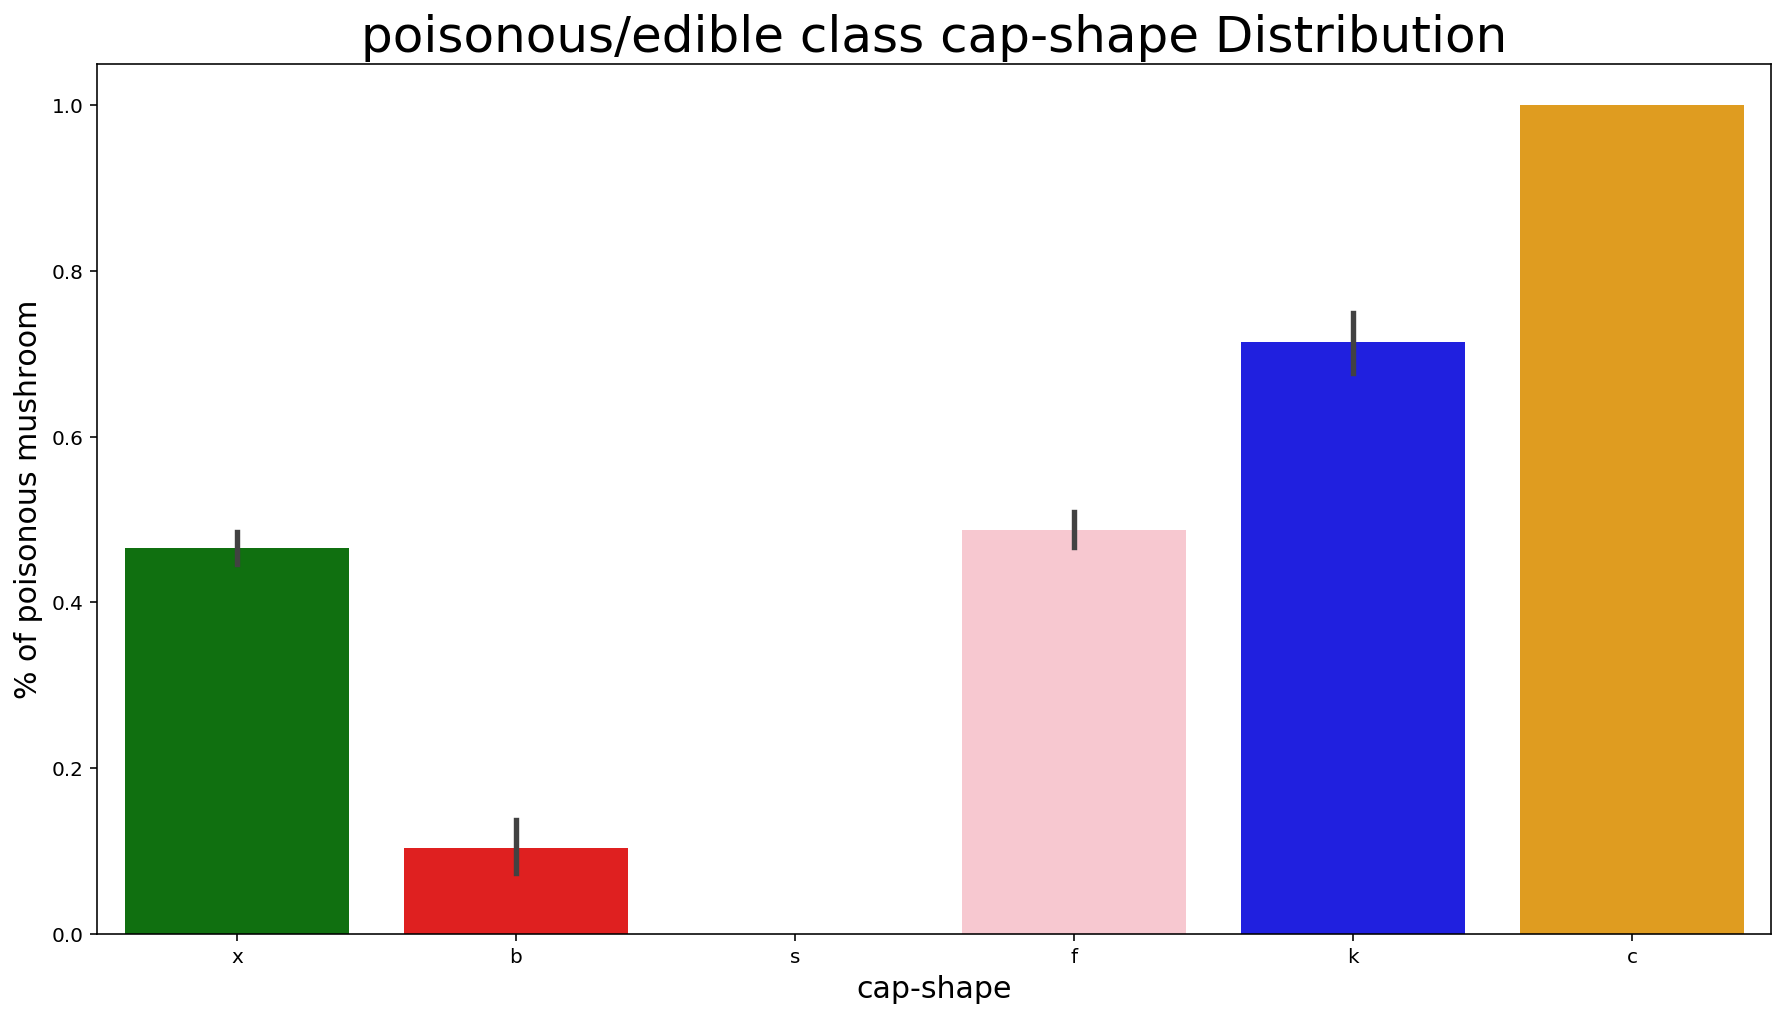

In [13]:
pal = {'x':"green", 'f':"Pink", 'k':"blue", 'b':"red", 's':"yellow", 'c':"orange"}
plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = "cap-shape", y = "class", data=train_copy, palette = pal, linewidth=2)
plt.title("poisonous/edible class cap-shape Distribution", fontsize = 25)
plt.ylabel("% of poisonous mushroom", fontsize = 15)
plt.xlabel("cap-shape", fontsize = 15);

The bar plot above shows the distribution of x, b, s, f, k and c poisonous mushroom, the x_label represents cap-shape feature while the y_label represents the % of poisonous mushroom. The bar chart shows about 45% of x are poisonous, 10% of b are poisonous, none of s are poisonous, 50% of f are poisonous, 75% of k are poisonous and all of c are poisonous.

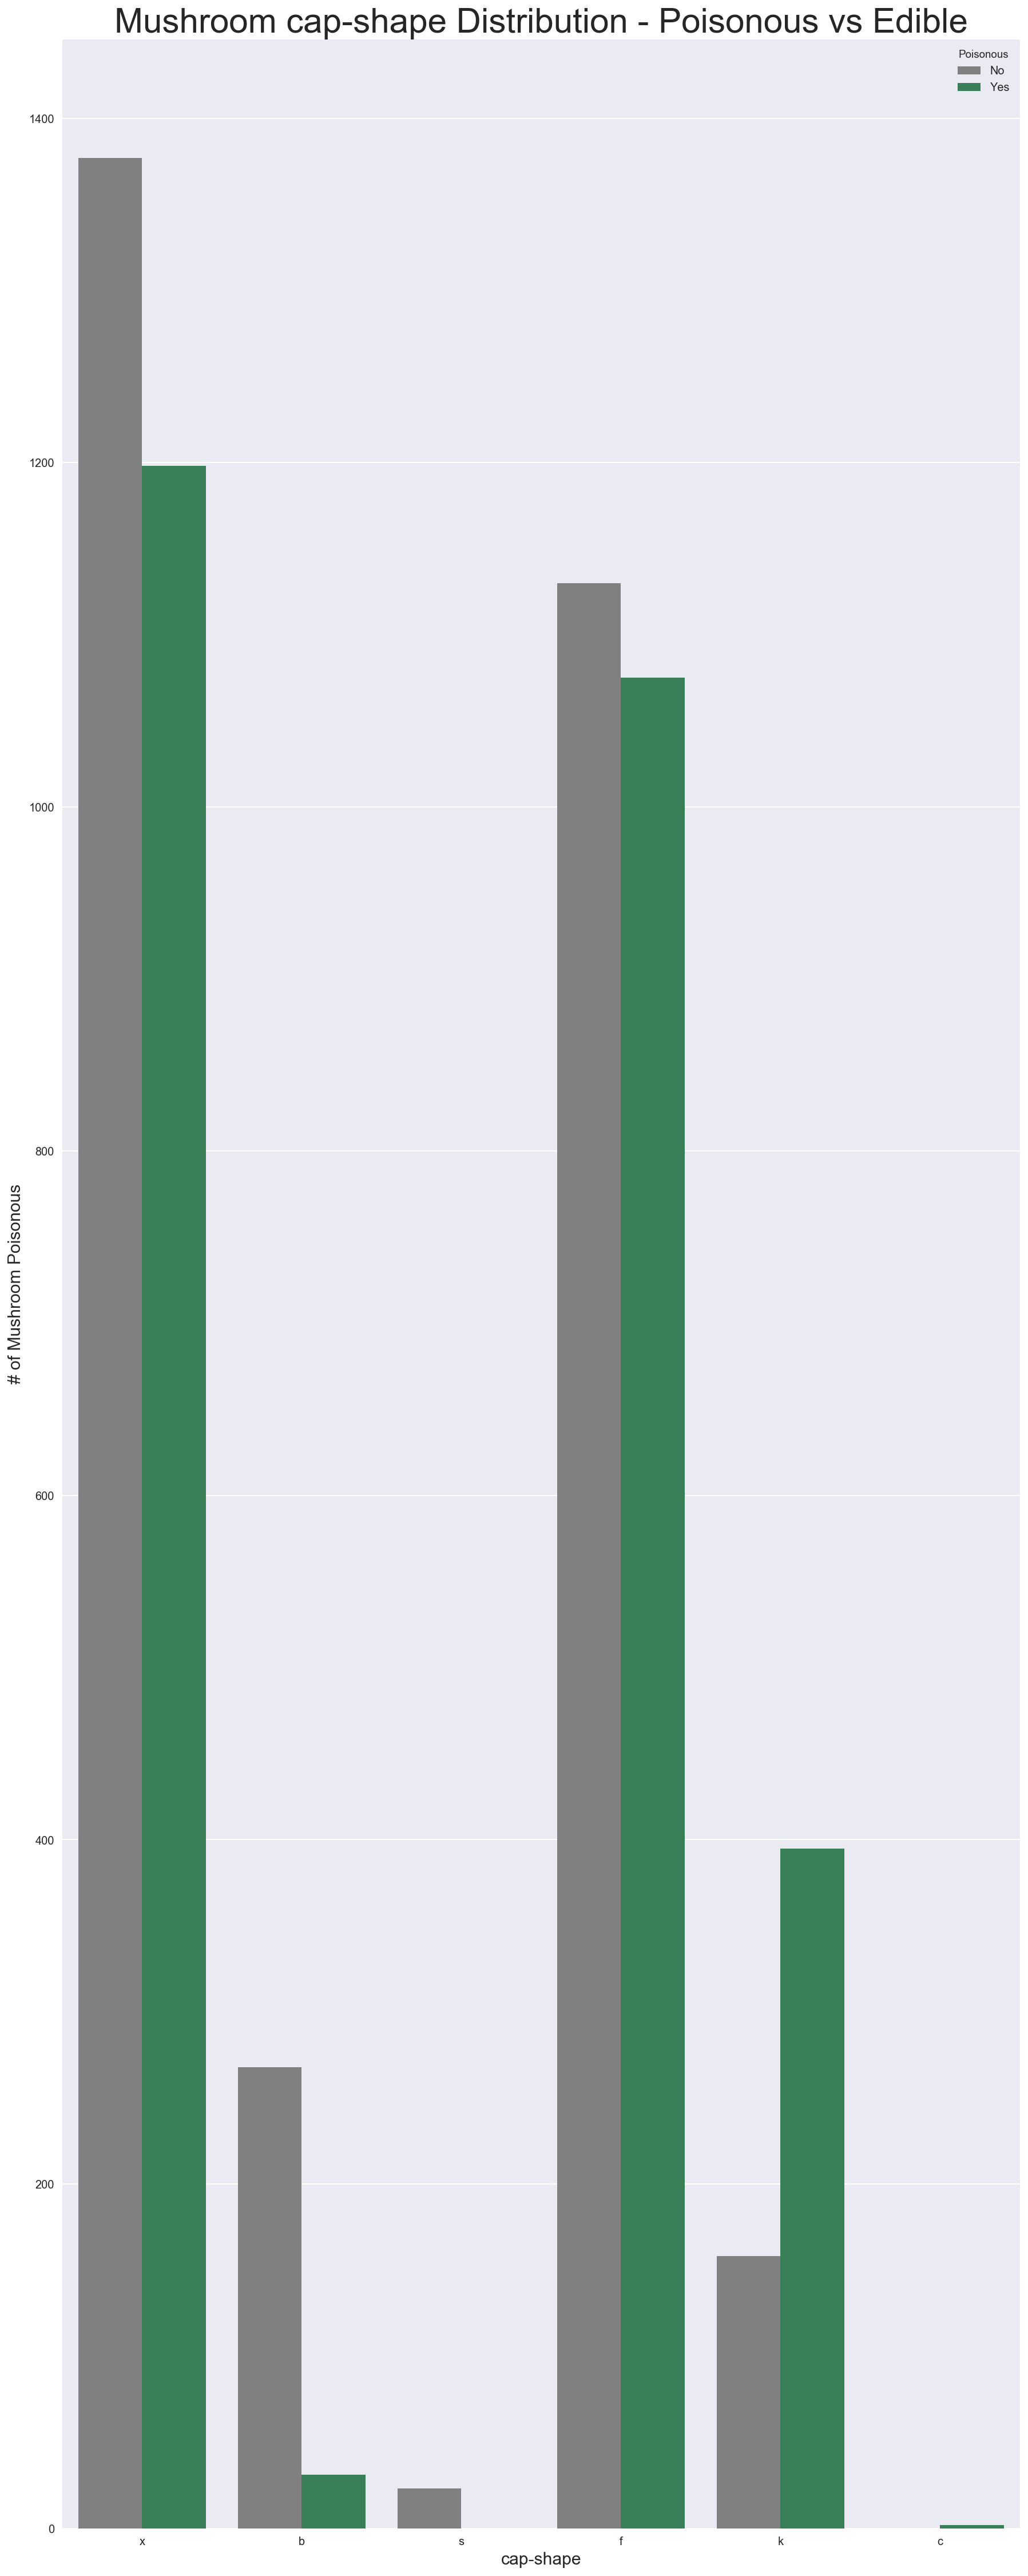

In [14]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,40))
ax = sns.countplot(x = "cap-shape",
                  hue = "class",
                  data = train_copy, 
                   linewidth = 2,
                  palette = pal
)

# Fixing title, xlabel and ylabel
plt.title("Mushroom cap-shape Distribution - Poisonous vs Edible", fontsize = 30)
plt.xlabel("cap-shape", fontsize = 15);
plt.ylabel("# of Mushroom Poisonous", fontsize = 15)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Poisonous")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()


## 3b. cap-surface and class

In [15]:
train['cap-surface'].value_counts()

y    2241
s    1779
f    1633
g       4
Name: cap-surface, dtype: int64

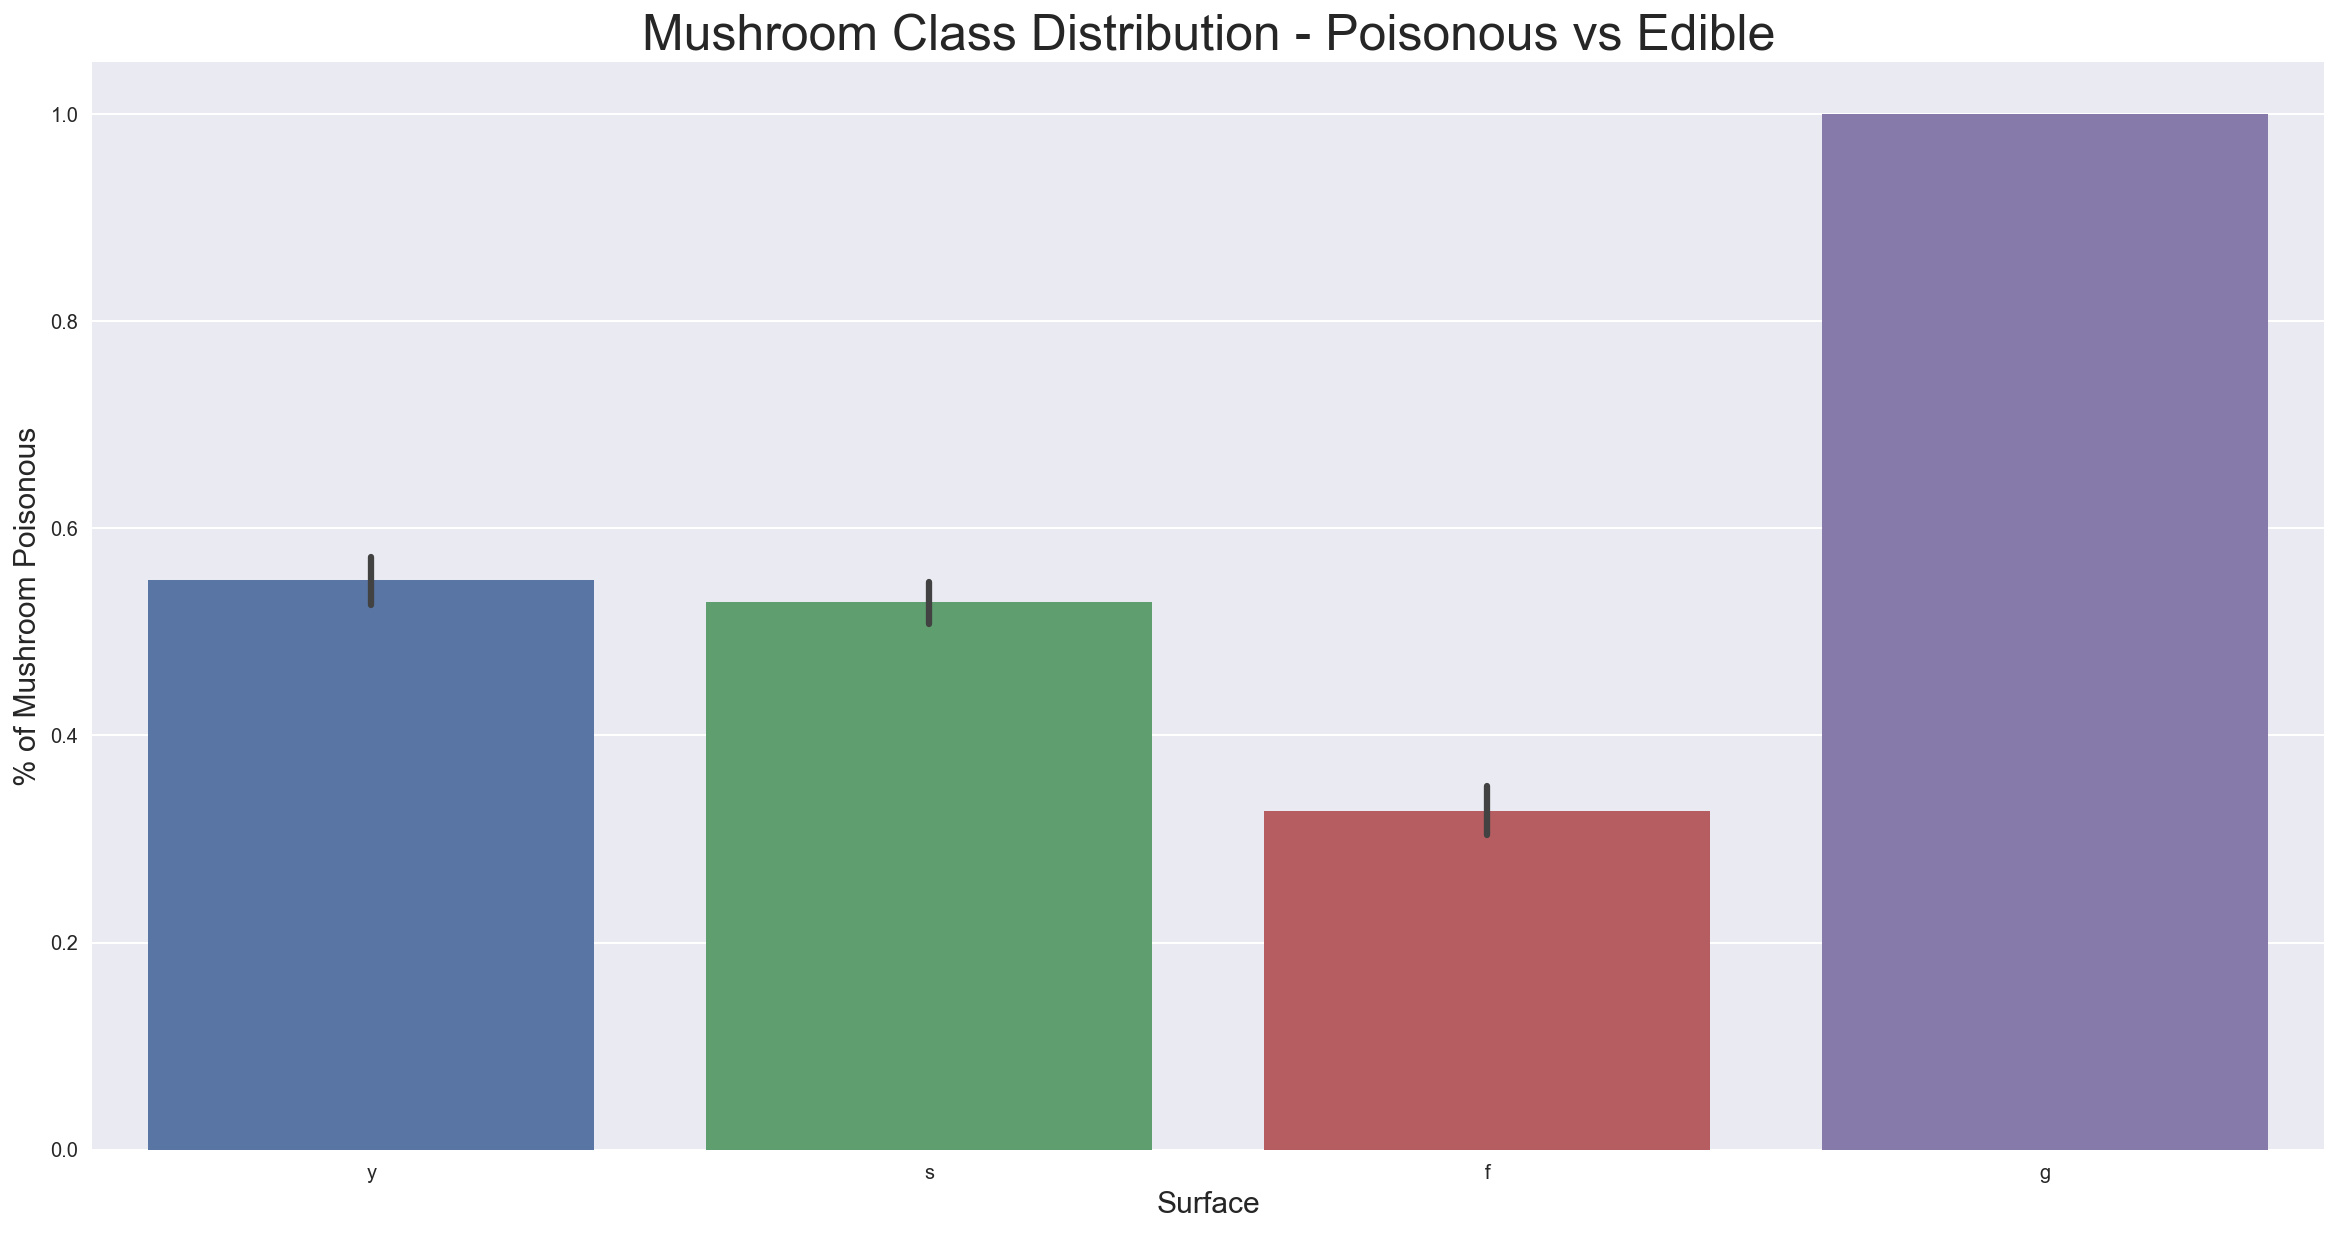

In [16]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "cap-surface", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("Surface", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['y', 's', 'f', 'g']
val = [0, 1, 2, 3]
plt.xticks(val, labels);

It looks like 57% of y, 55% of s, 35% of f and 100% of g are poisonous.

## 3c. cap-color and class

In [17]:
train['cap-color'].value_counts()

n    1592
g    1282
e    1051
y     739
w     731
b     112
p      97
c      30
r      12
u      11
Name: cap-color, dtype: int64

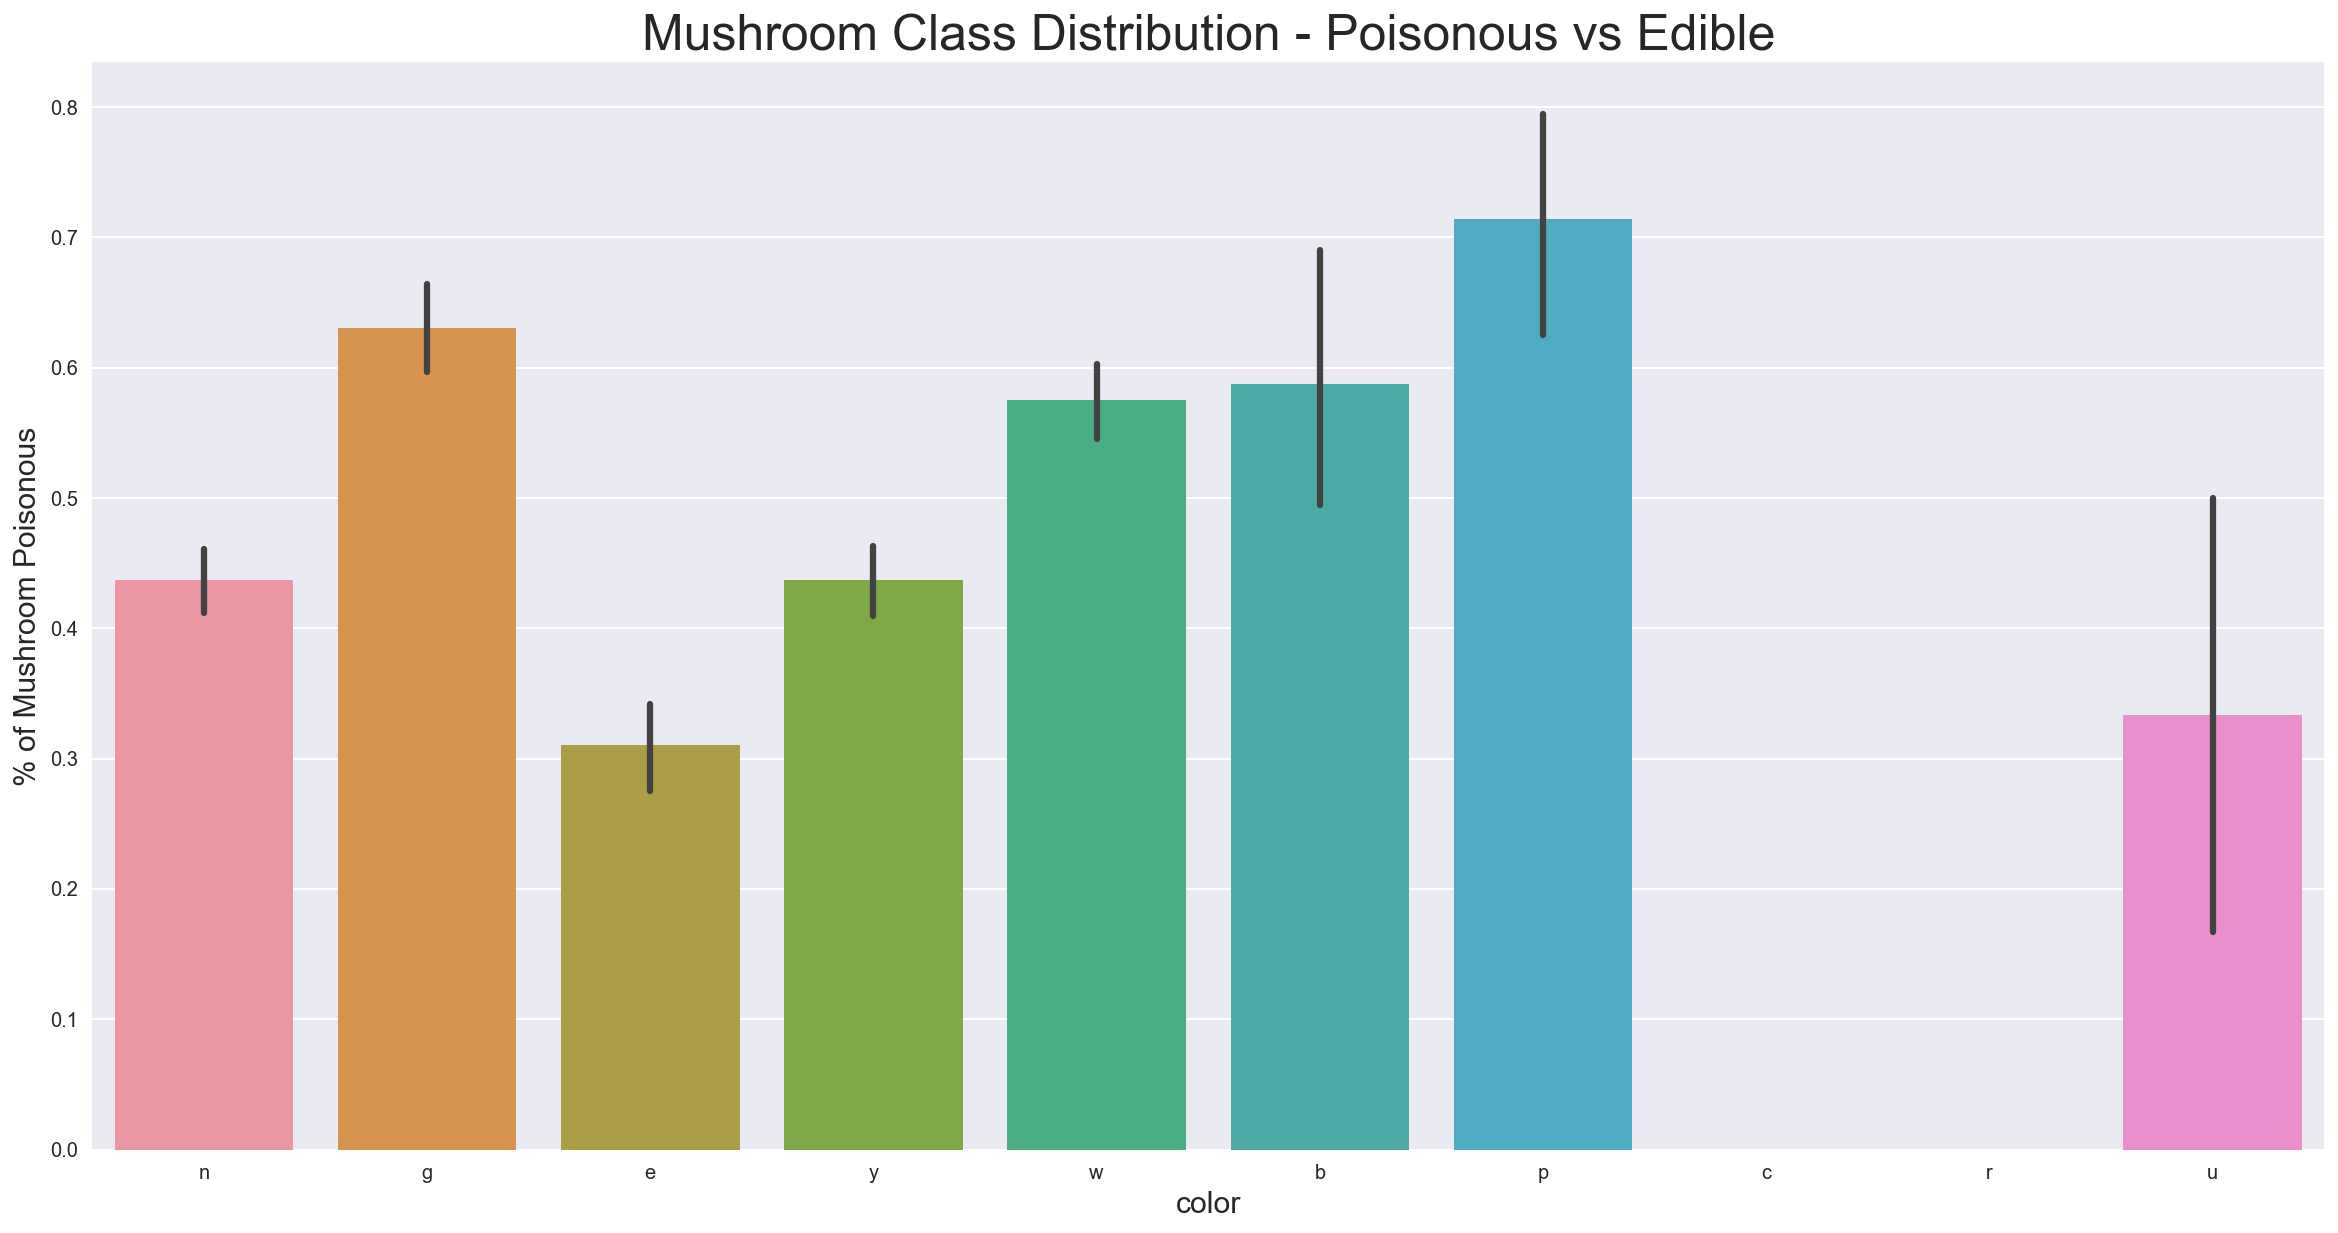

In [18]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "cap-color", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("color", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'r', 'u']
val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xticks(val, labels);

It looks like 44% of n, 67% of g, 32% of e, 47% of y, 58% of w, 59% of b, 72% of p, none of c, none of r and 35% of u are poisonous.

## 3d. bruises and class

In [19]:
train['bruises'].value_counts()

f    3293
t    2364
Name: bruises, dtype: int64

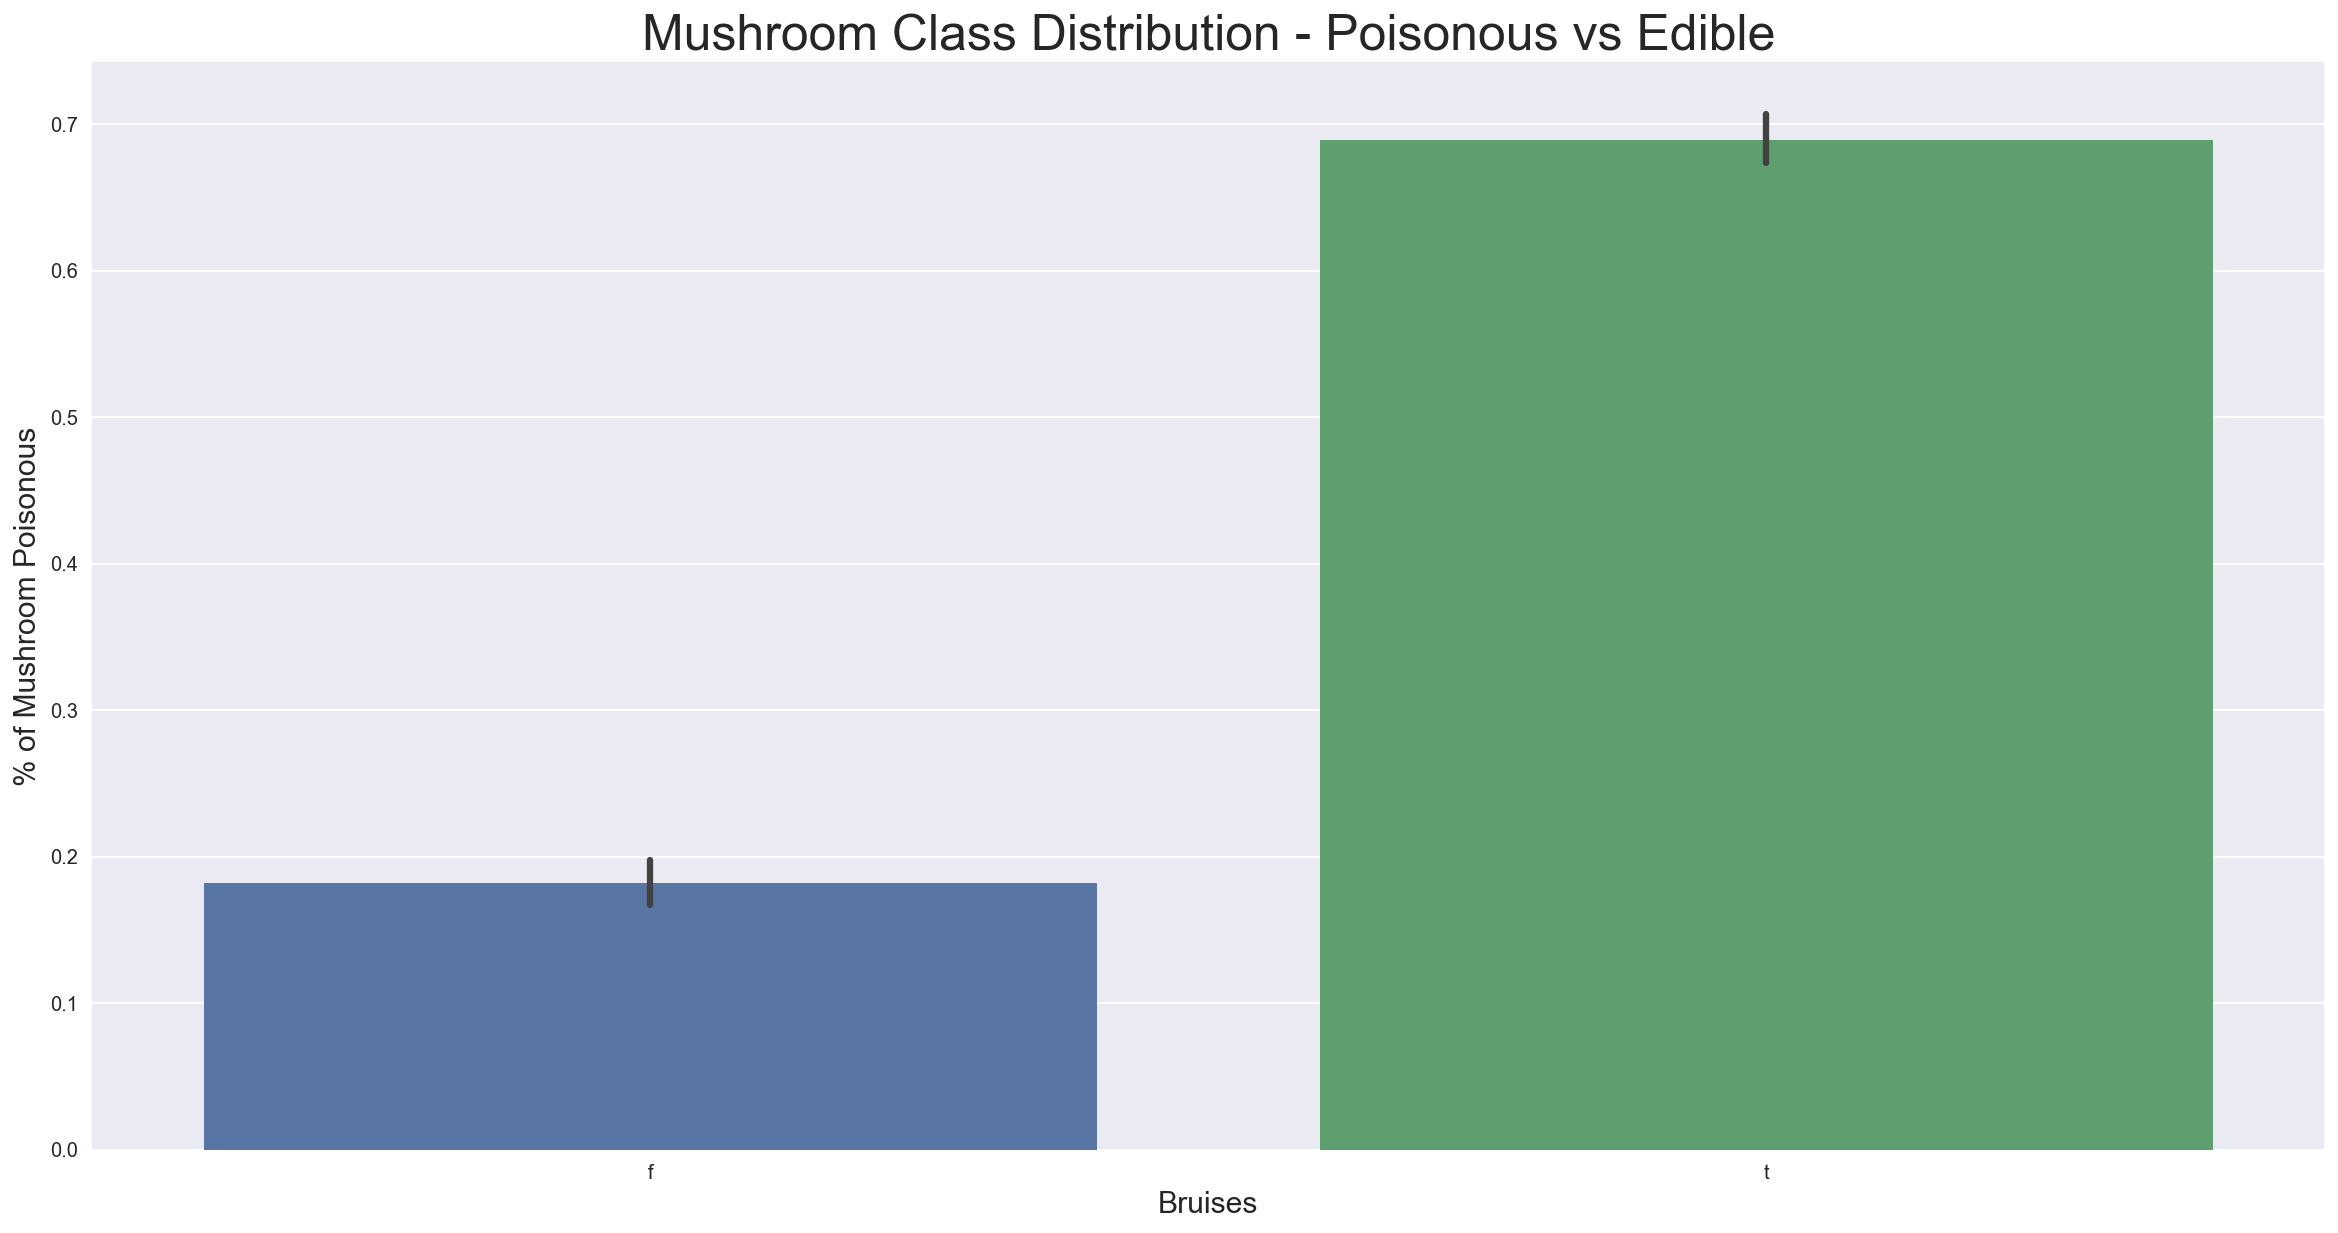

In [20]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "bruises", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("Bruises", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['f','t']
val = [0, 1]
plt.xticks(val, labels);

From the barplot, 18% of f and 79% of t are poisonous.

## 3e. odor and class

In [21]:
train['odor'].value_counts()

n    2482
f    1522
y     388
s     383
l     289
a     270
p     174
c     124
m      25
Name: odor, dtype: int64

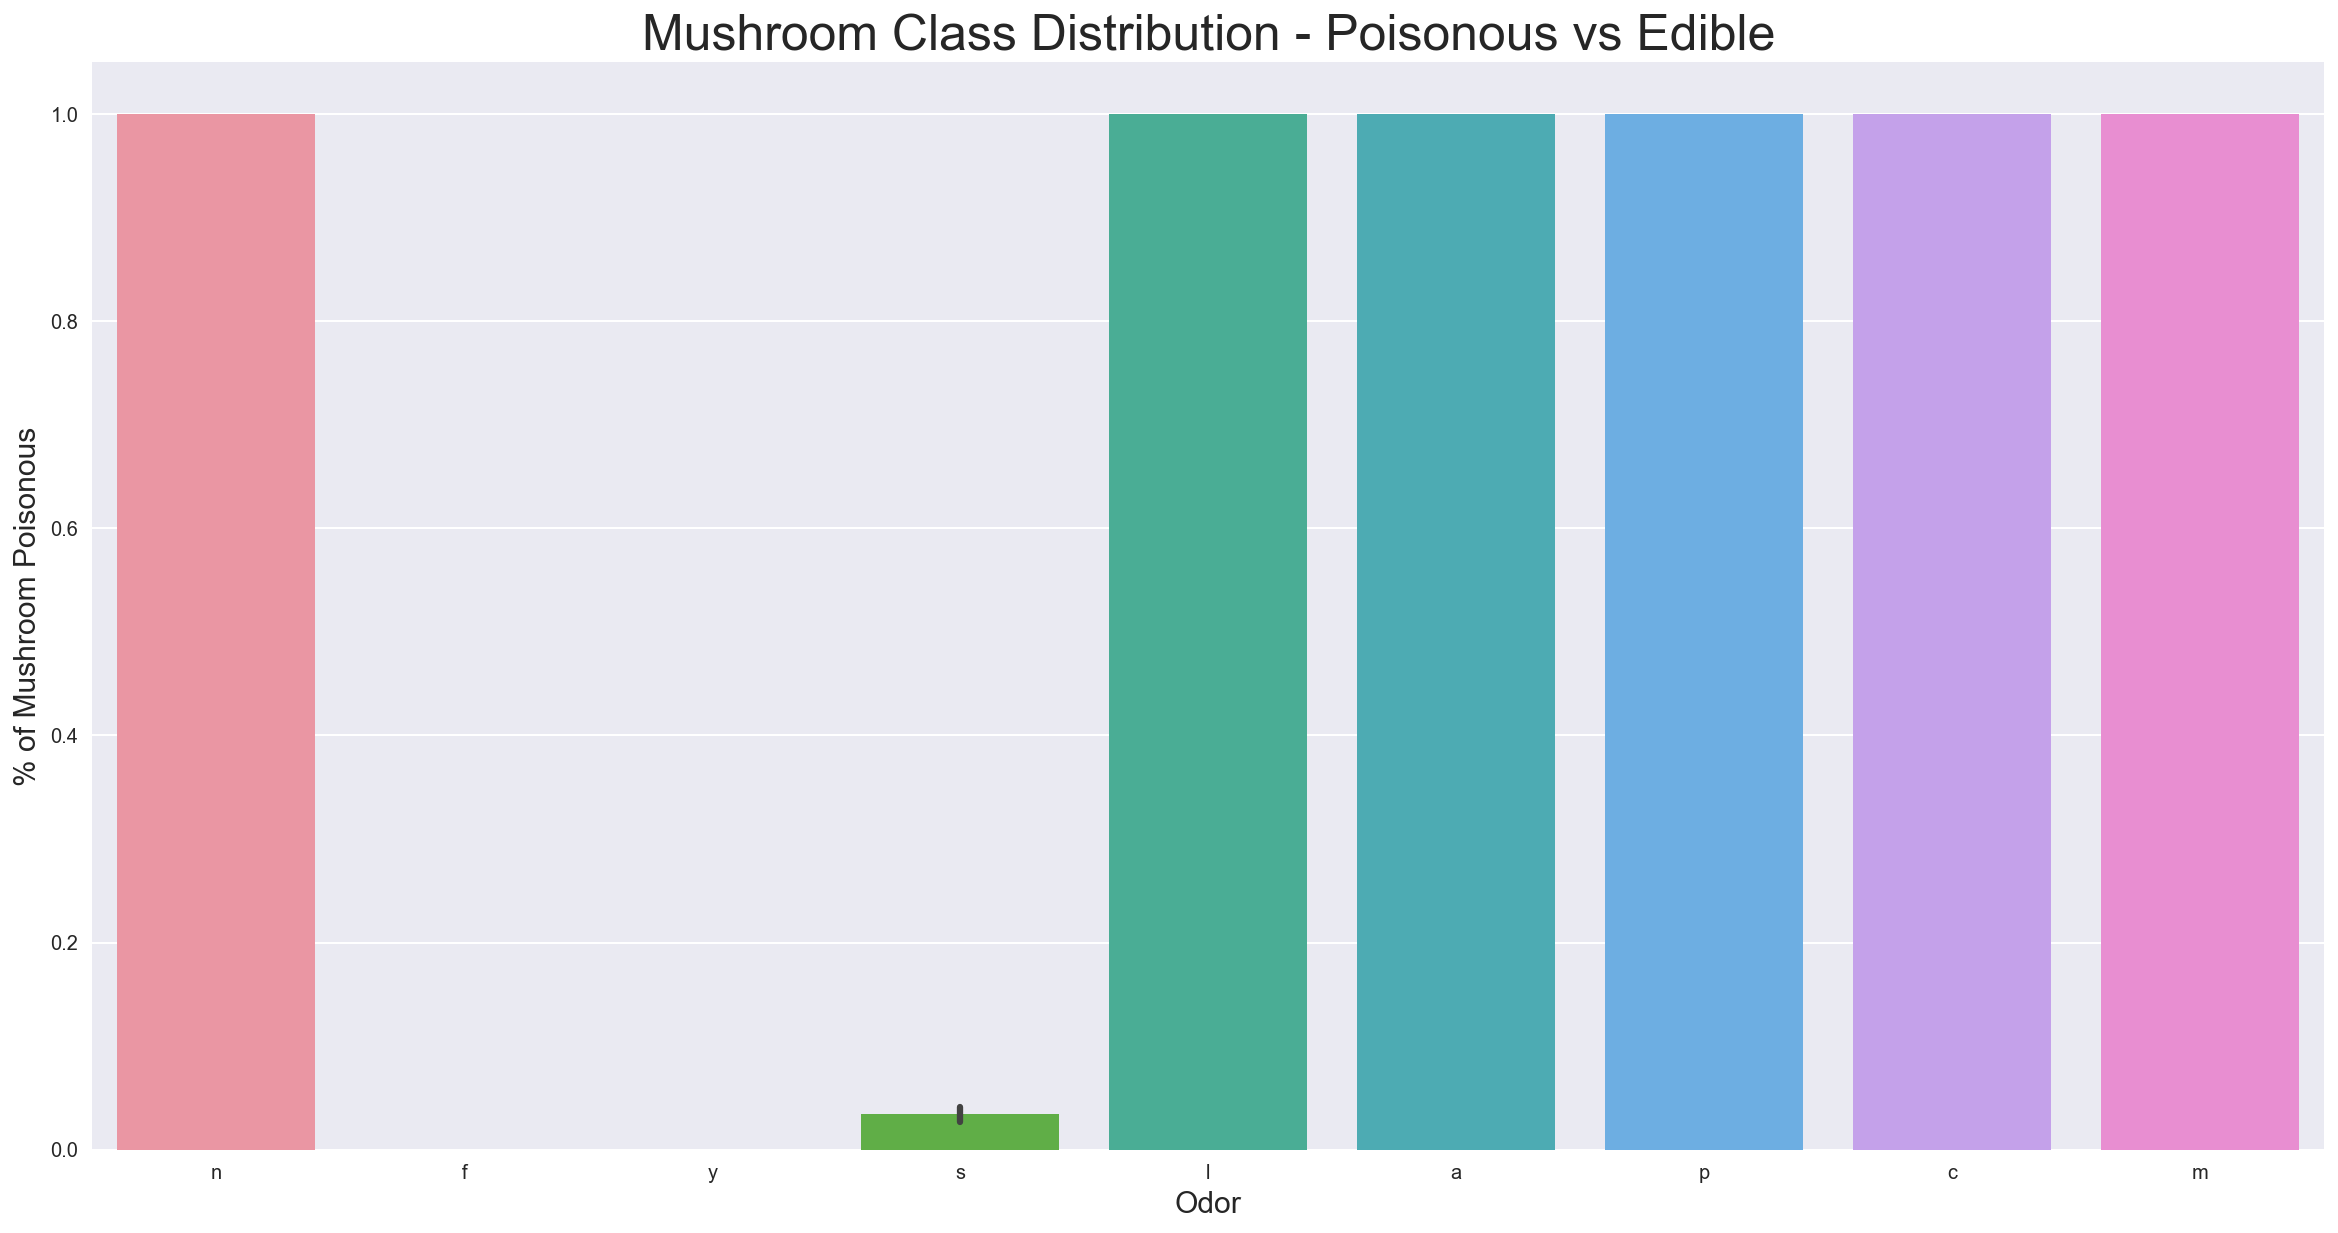

In [22]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "odor", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("Odor", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['n','f', 'y', 's', 'l', 'a', 'p', 'c', 'm']
val = [0, 1, 2, 3, 4, 5, 6, 7, 8]
plt.xticks(val, labels);

n, l, a, p, c and m are all poisonous, f and y are all edible.

#### We decide not to use the feature 'odor', as most of the categories of the features skewed seriously.

## 3f. gill-attachment, gill-spacing, gill-size, gill-color and class

In [23]:
train["gill-attachment"].value_counts()

f    5515
a     142
Name: gill-attachment, dtype: int64

In [24]:
train["gill-spacing"].value_counts()

c    4735
w     922
Name: gill-spacing, dtype: int64

In [25]:
train["gill-size"].value_counts()

b    3926
n    1731
Name: gill-size, dtype: int64

In [26]:
train["gill-color"].value_counts()

b    1190
p    1043
w     811
n     741
g     521
h     520
u     352
k     291
e      75
y      53
o      44
r      16
Name: gill-color, dtype: int64

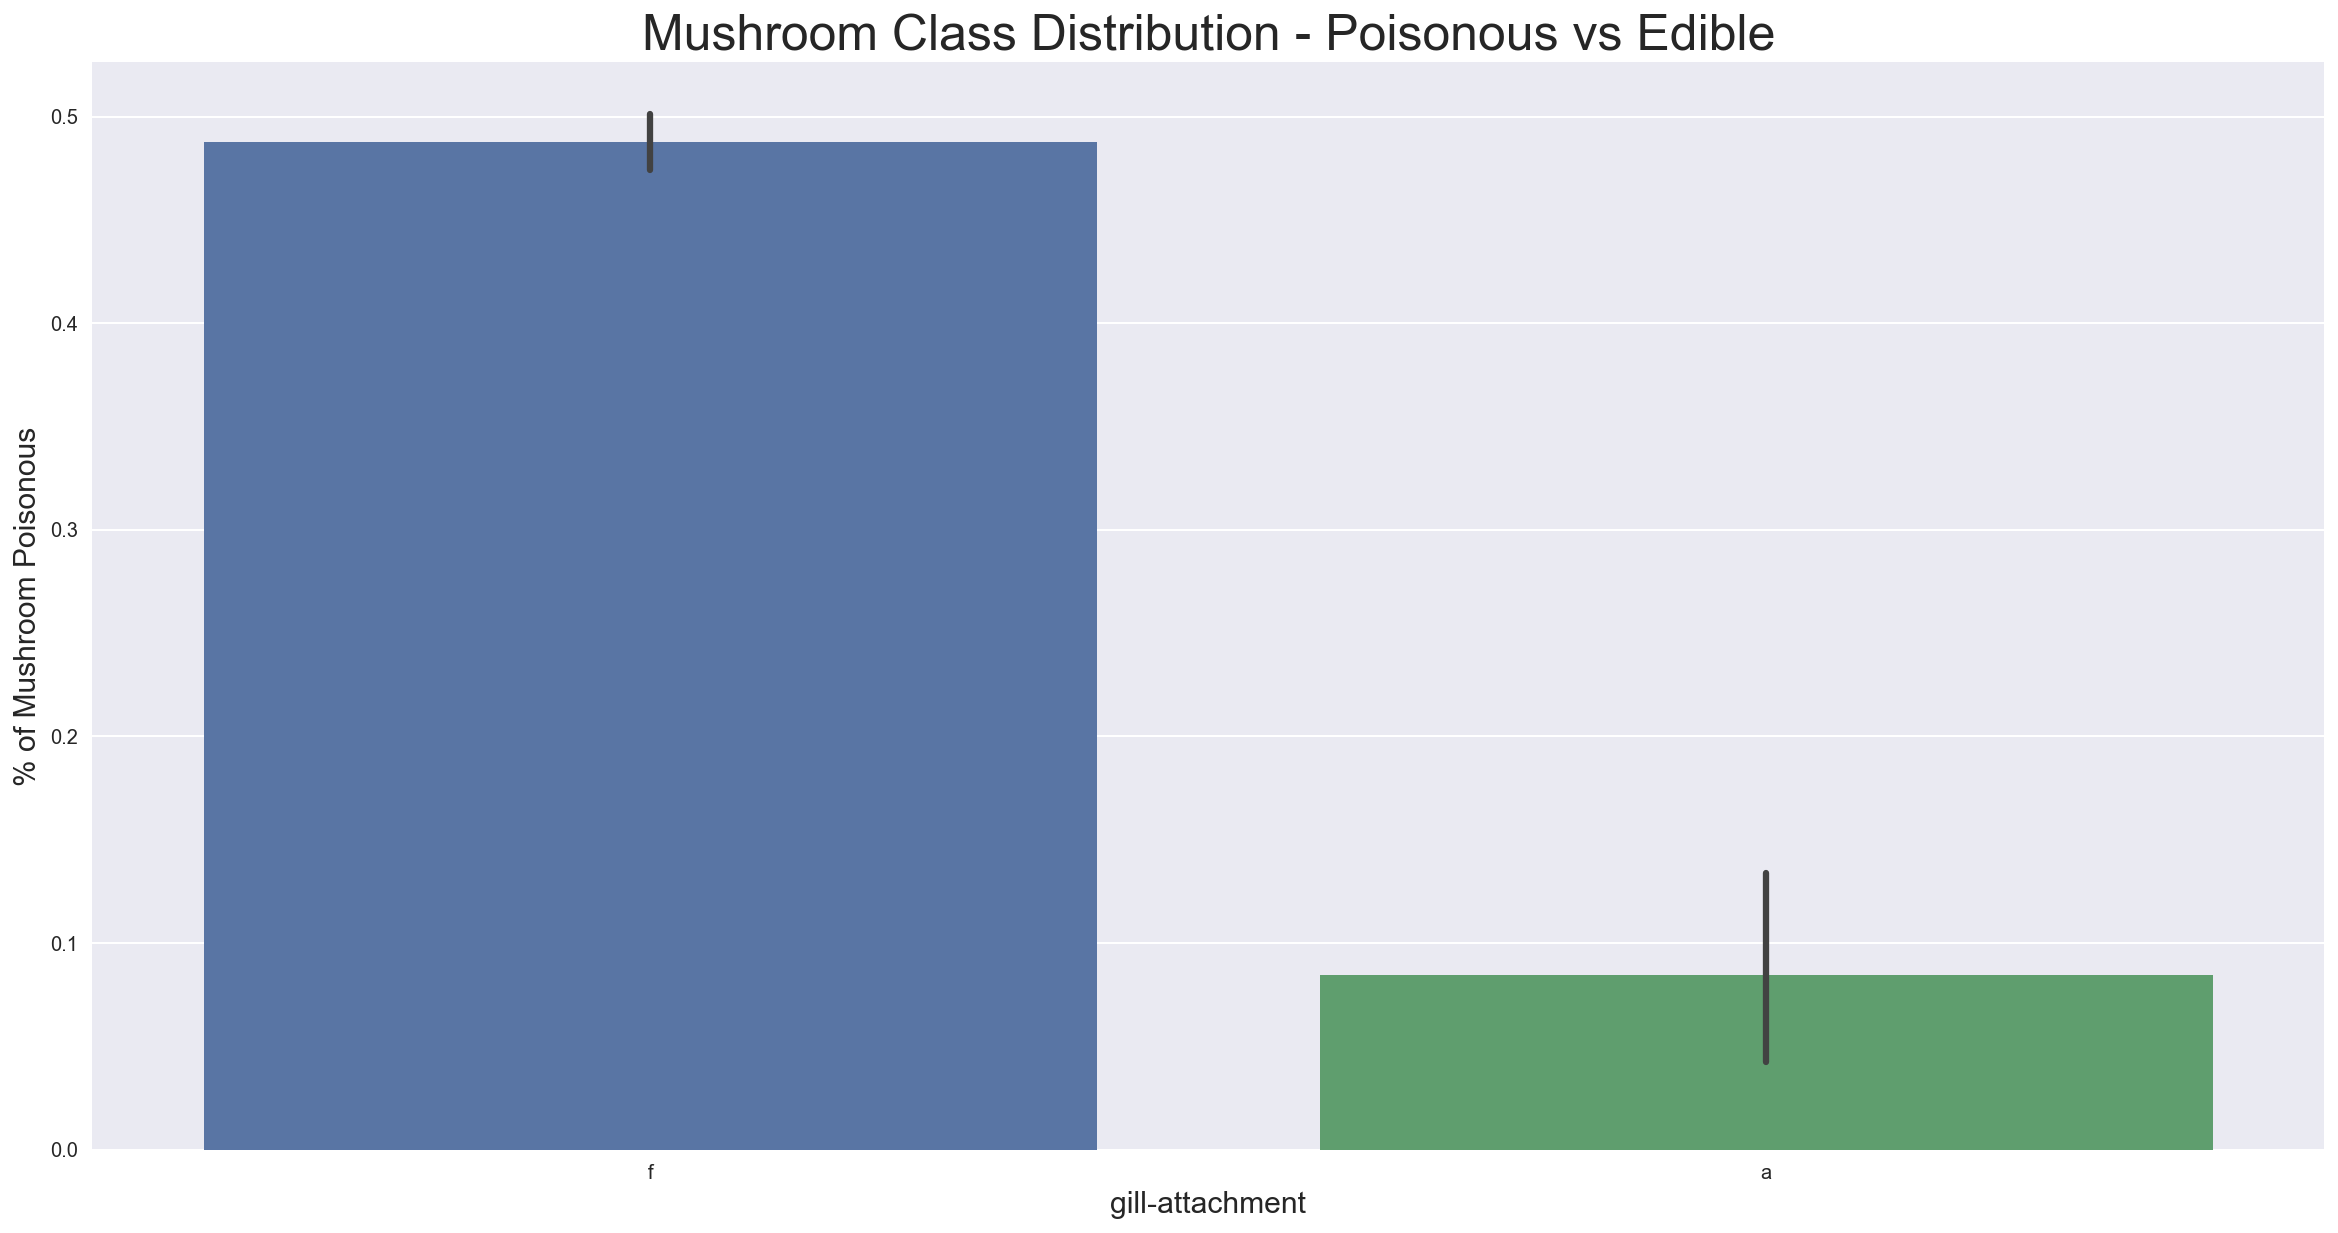

In [27]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "gill-attachment", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("gill-attachment", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['f', 'a']
val = [0, 1]
plt.xticks(val, labels);

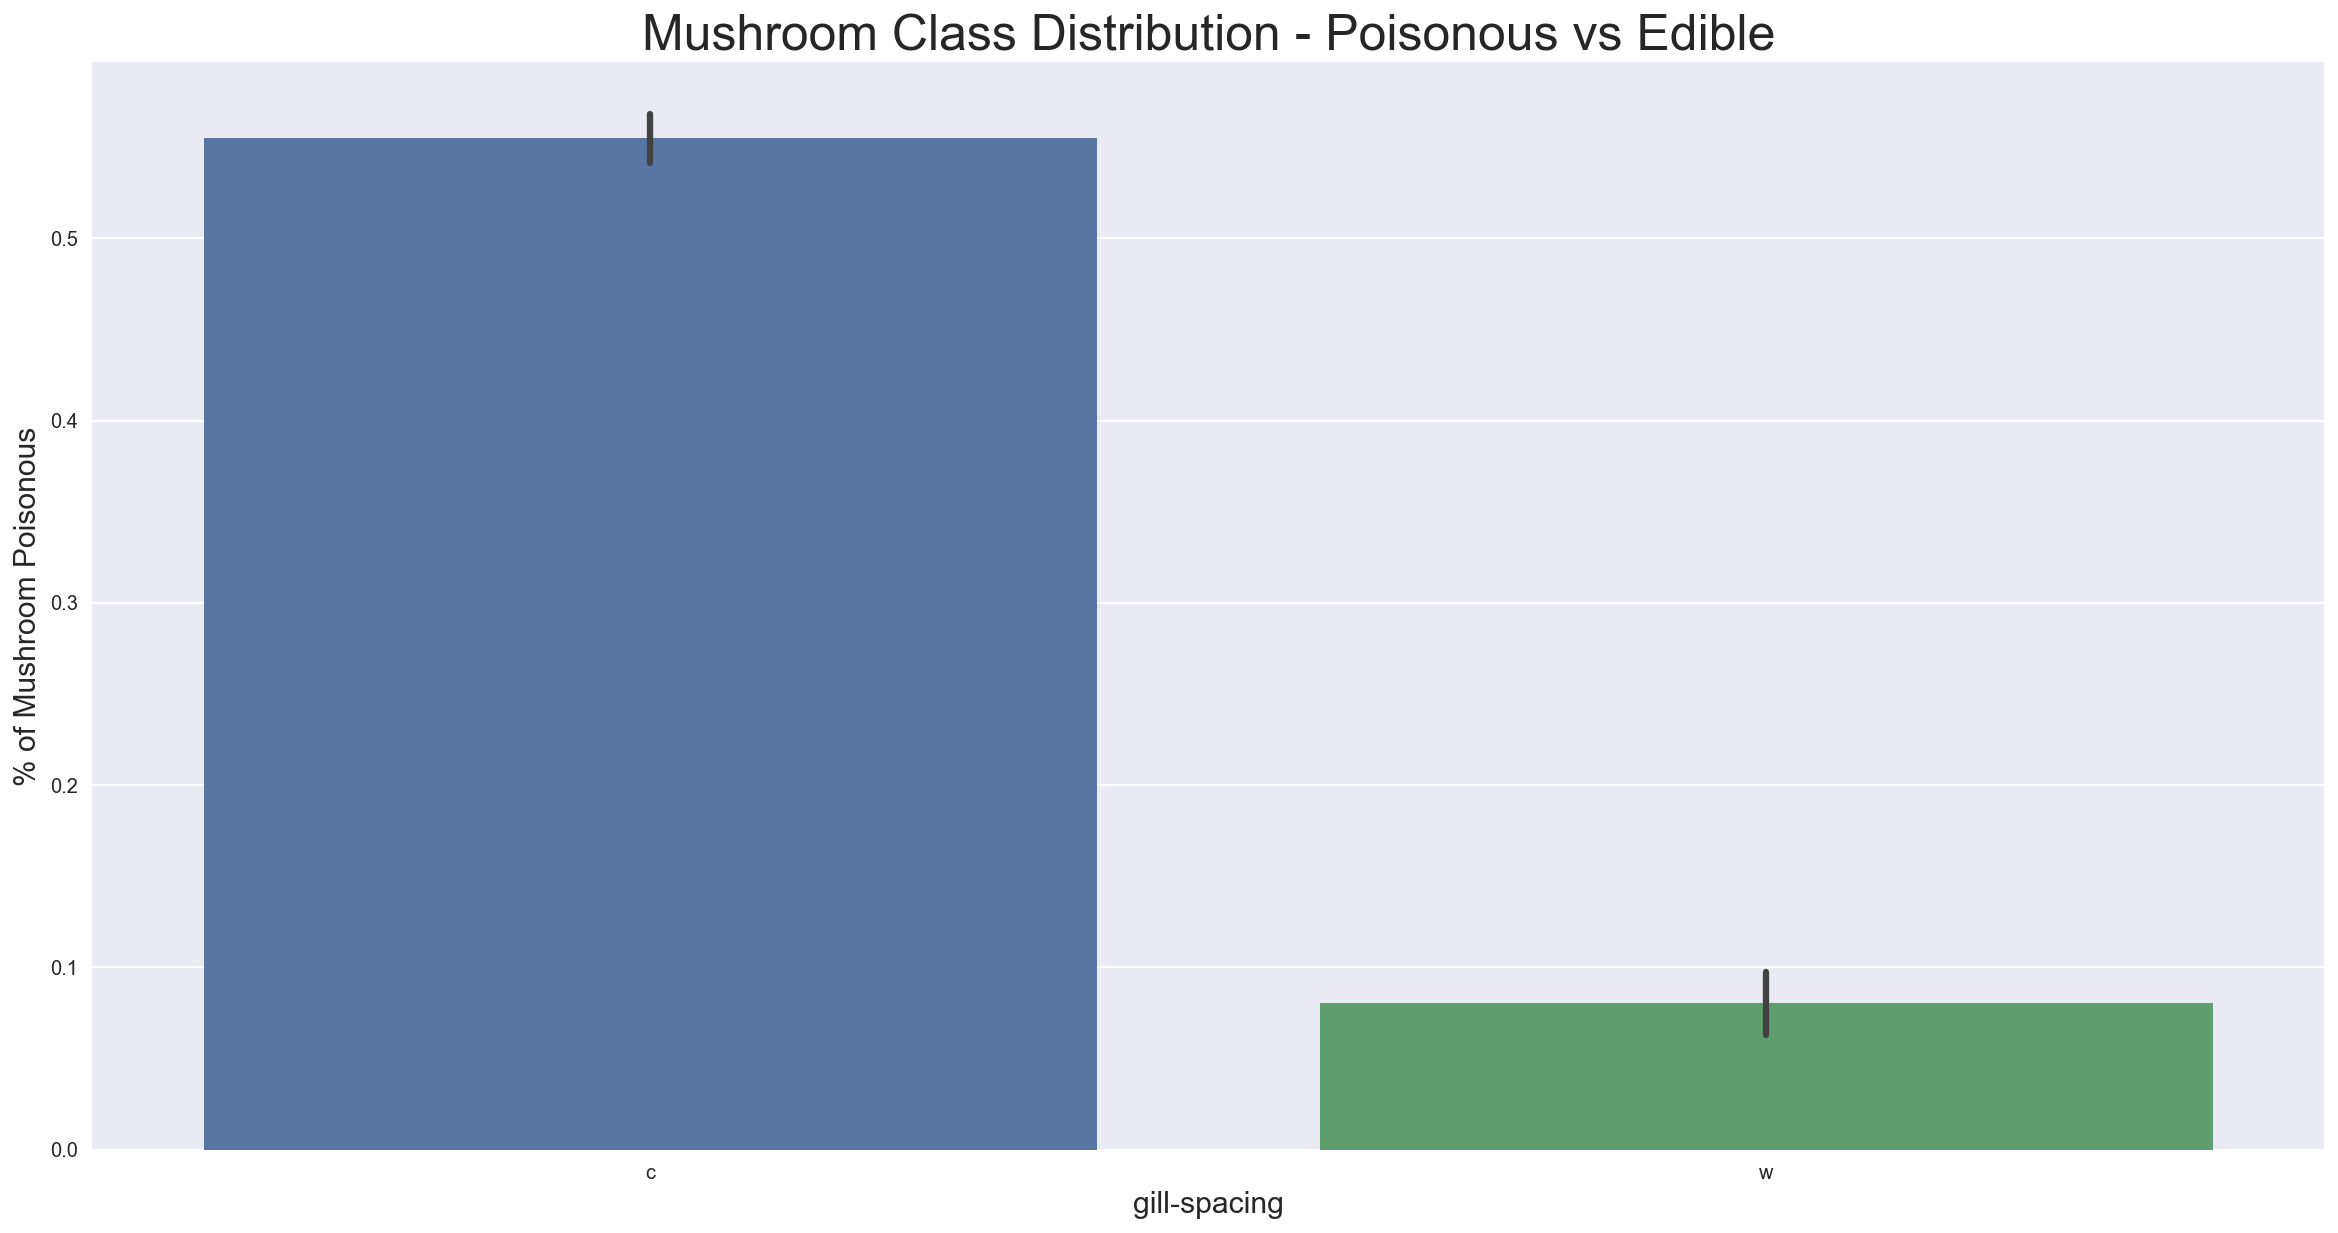

In [28]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "gill-spacing", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("gill-spacing", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['c', 'w']
val = [0, 1]
plt.xticks(val, labels);

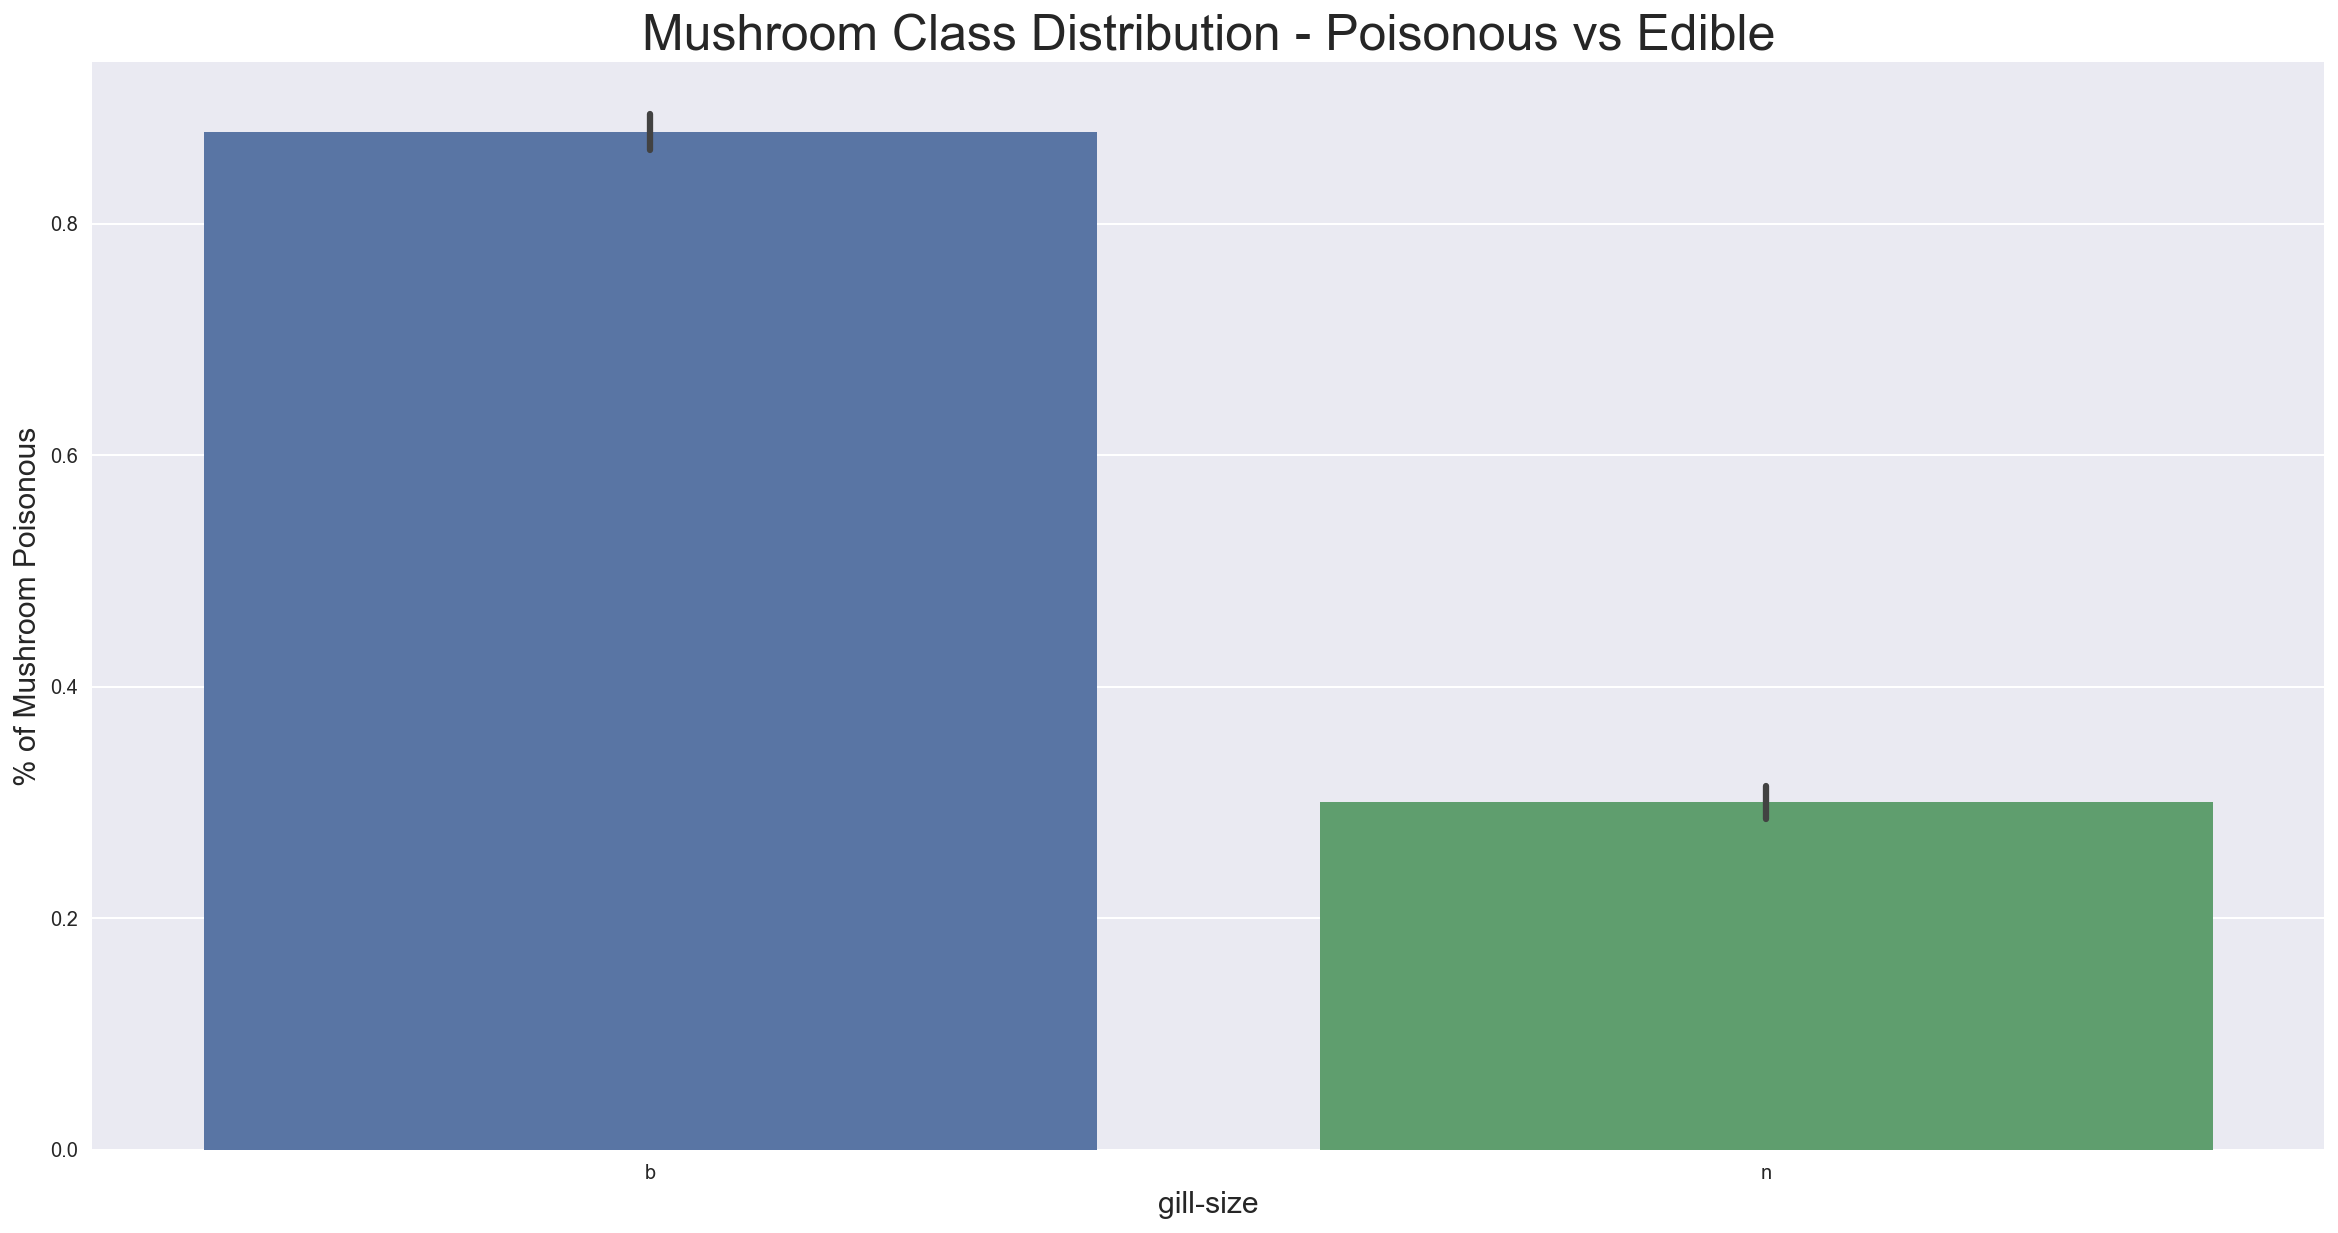

In [29]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "gill-size", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("gill-size", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['b', 'n']
val = [0, 1]
plt.xticks(val, labels);

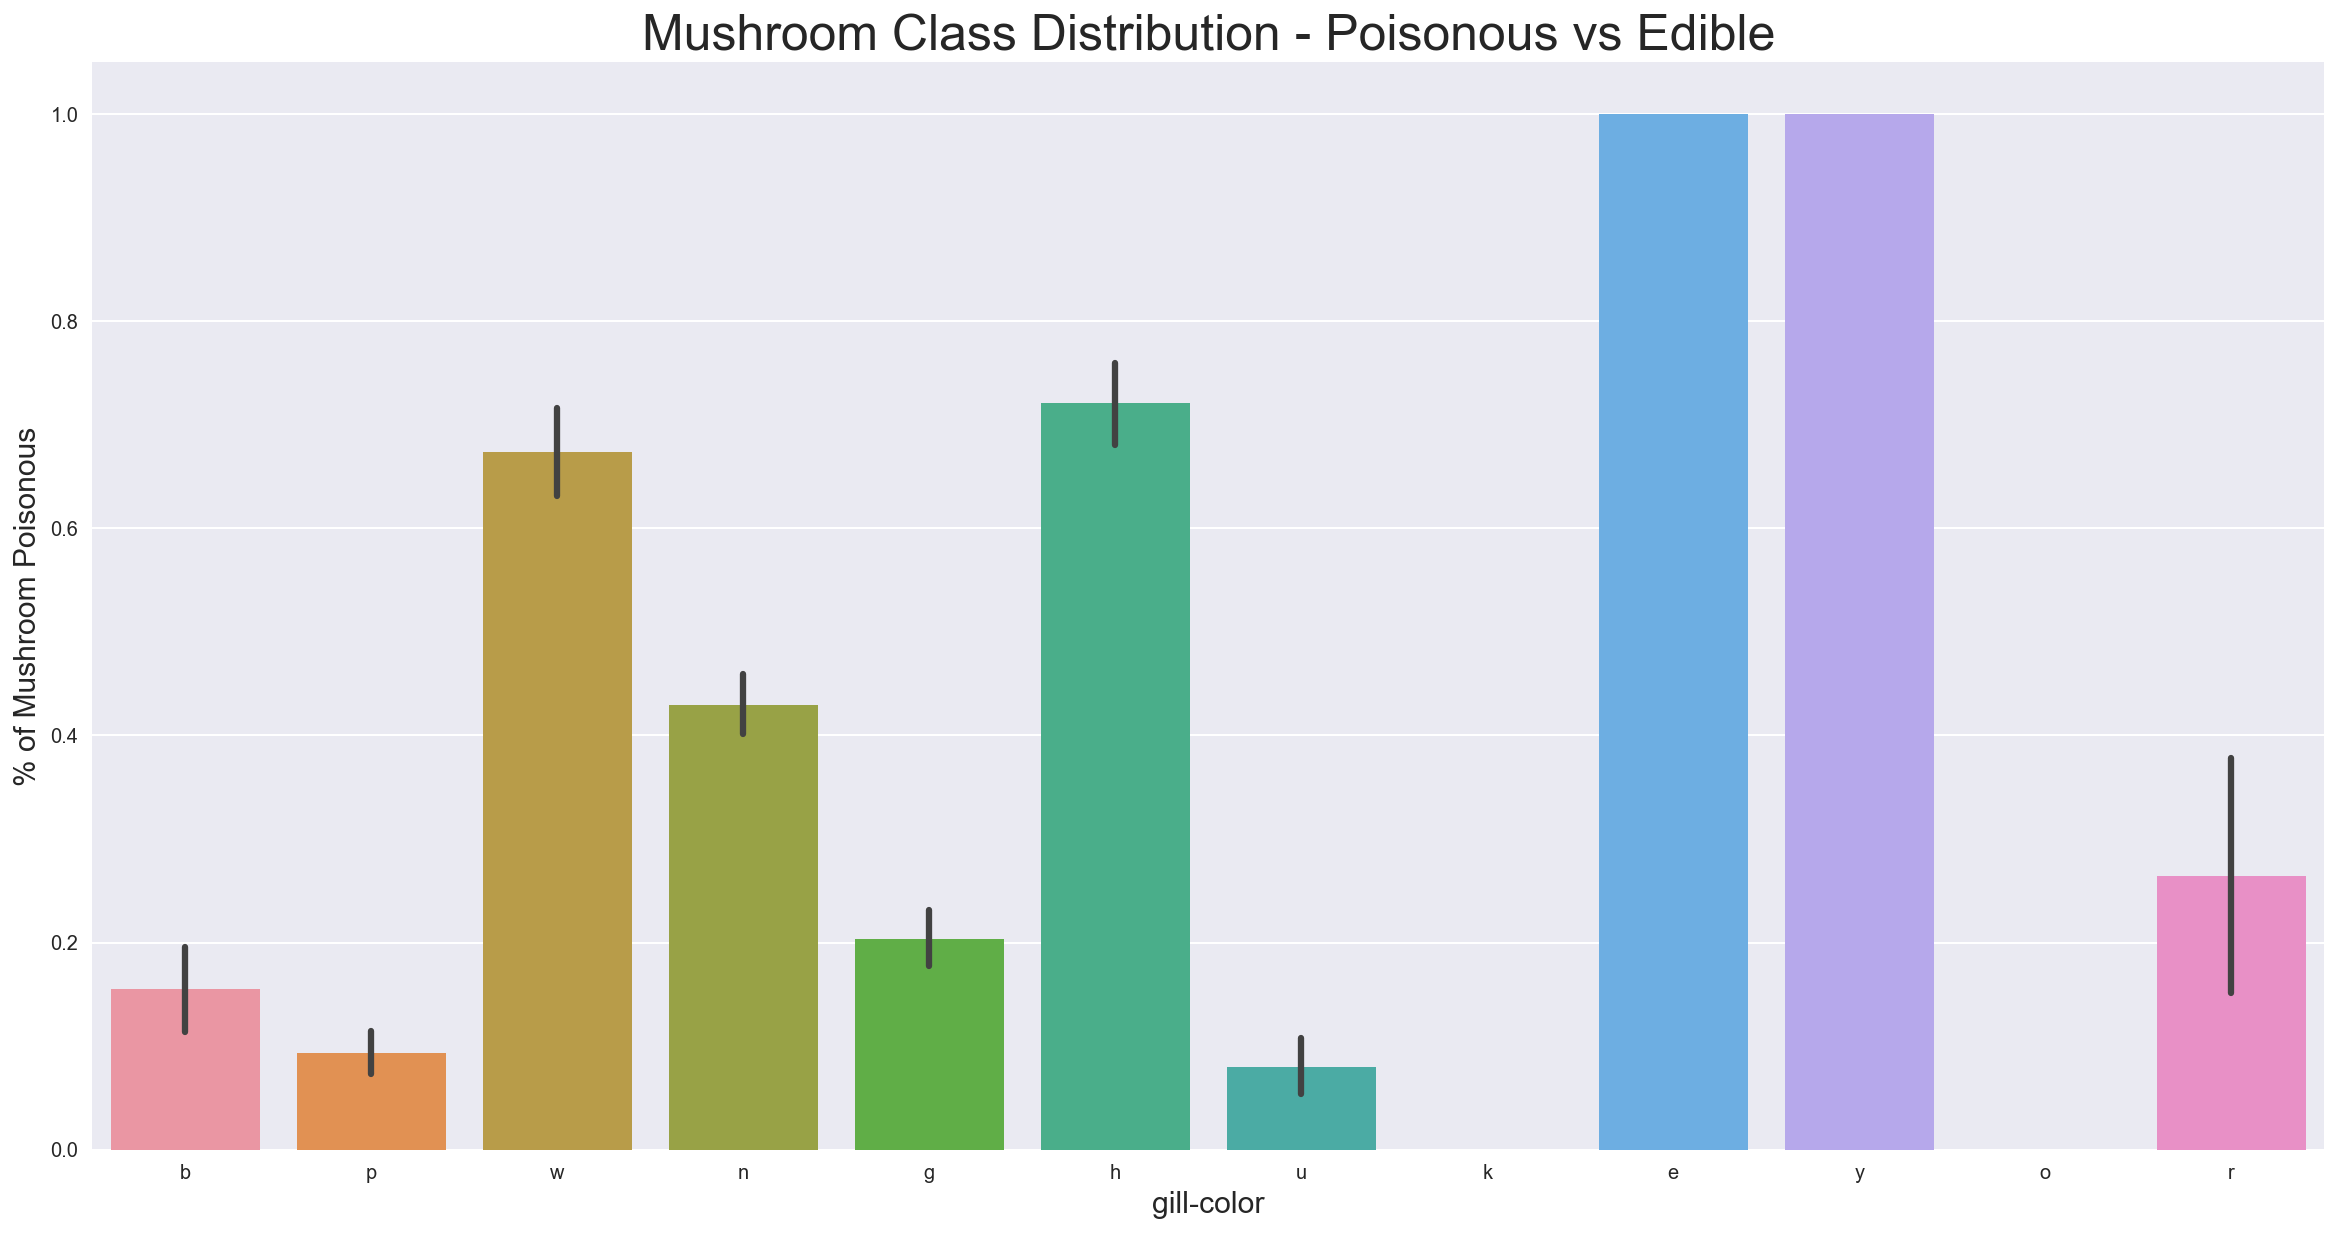

In [30]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "gill-color", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("gill-color", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r']
val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.xticks(val, labels);

In [31]:
train["stalk-shape"].value_counts()

t    3230
e    2427
Name: stalk-shape, dtype: int64

In [32]:
train["stalk-surface-above-ring"].value_counts()

s    3614
k    1645
f     381
y      17
Name: stalk-surface-above-ring, dtype: int64

In [33]:
train["stalk-surface-below-ring"].value_counts()

s    3439
k    1600
f     416
y     202
Name: stalk-surface-below-ring, dtype: int64

In [34]:
train["stalk-color-above-ring"].value_counts()

w    3088
p    1296
g     418
n     311
b     310
o     130
e      74
c      25
y       5
Name: stalk-color-above-ring, dtype: int64

In [35]:
train["stalk-color-below-ring"].value_counts()

w    3040
p    1307
g     403
n     356
b     311
o     130
e      68
c      25
y      17
Name: stalk-color-below-ring, dtype: int64

In [36]:
train["veil-type"].value_counts()

p    5657
Name: veil-type, dtype: int64

##### veil-type can be deleted

In [37]:
train["veil-color"].value_counts()

w    5522
n      67
o      63
y       5
Name: veil-color, dtype: int64

In [38]:
train["ring-number"].value_counts()

o    5219
t     413
n      25
Name: ring-number, dtype: int64

In [39]:
train["ring-type"].value_counts()

p    2755
e    1938
l     905
f      34
n      25
Name: ring-type, dtype: int64

In [40]:
train["spore-print-color"].value_counts()

w    1642
n    1398
k    1296
h    1137
r      51
o      37
u      35
b      32
y      29
Name: spore-print-color, dtype: int64

In [41]:
train["population"].value_counts()

v    2817
y    1191
s     872
n     274
a     265
c     238
Name: population, dtype: int64

In [42]:
train["habitat"].value_counts()

d    2219
g    1497
p     779
l     562
u     260
m     201
w     139
Name: habitat, dtype: int64

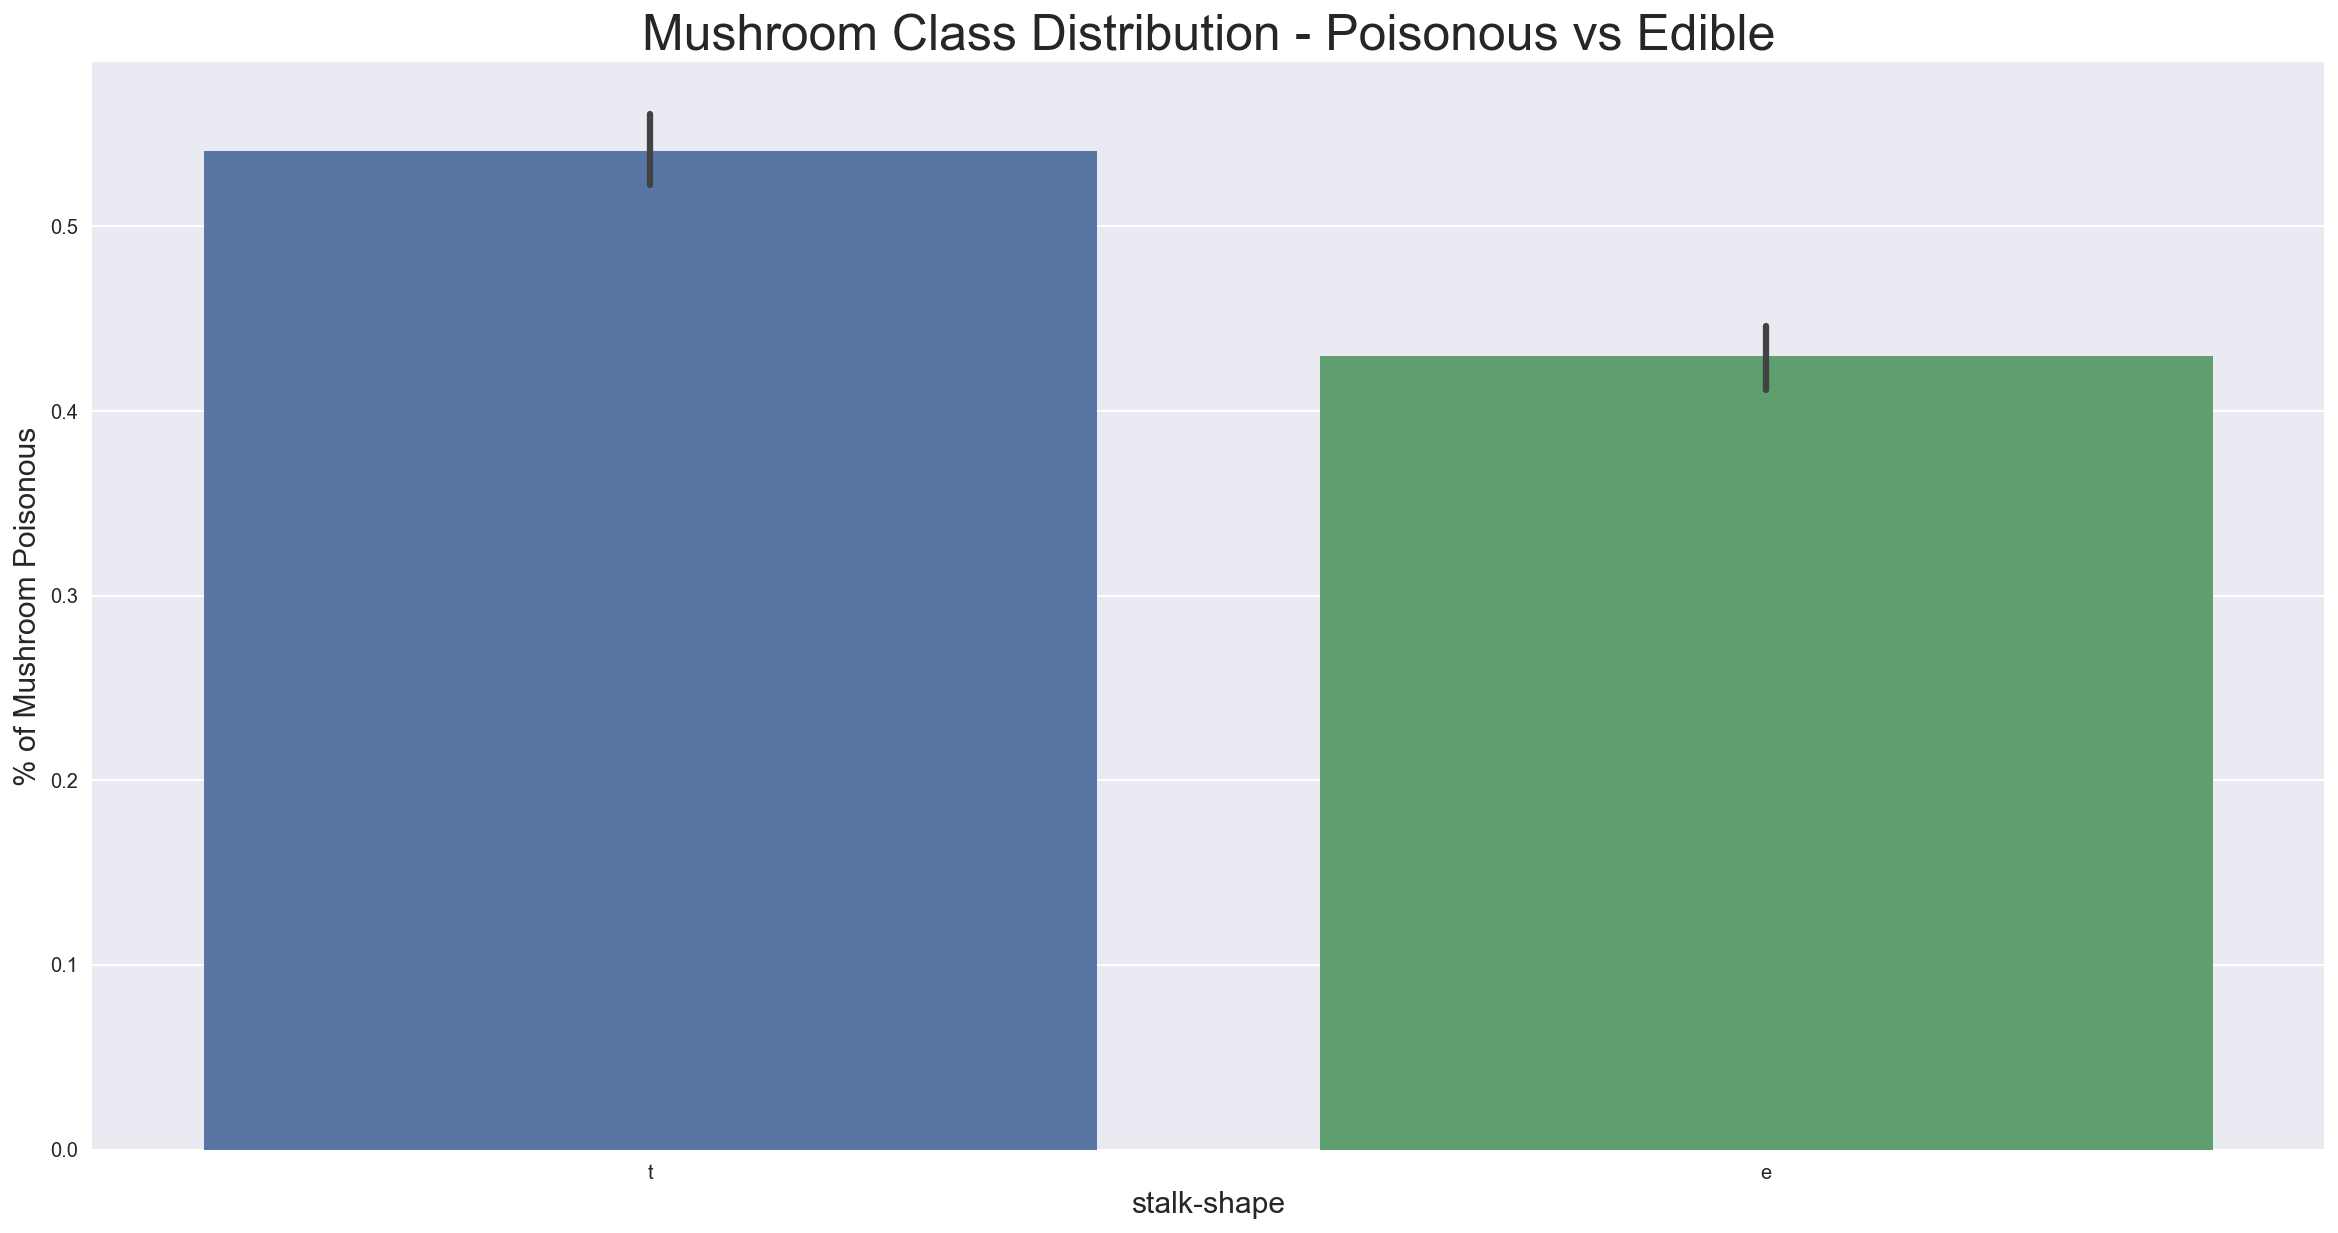

In [43]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "stalk-shape", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("stalk-shape", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['t','e']
val = [0, 1]
plt.xticks(val, labels);

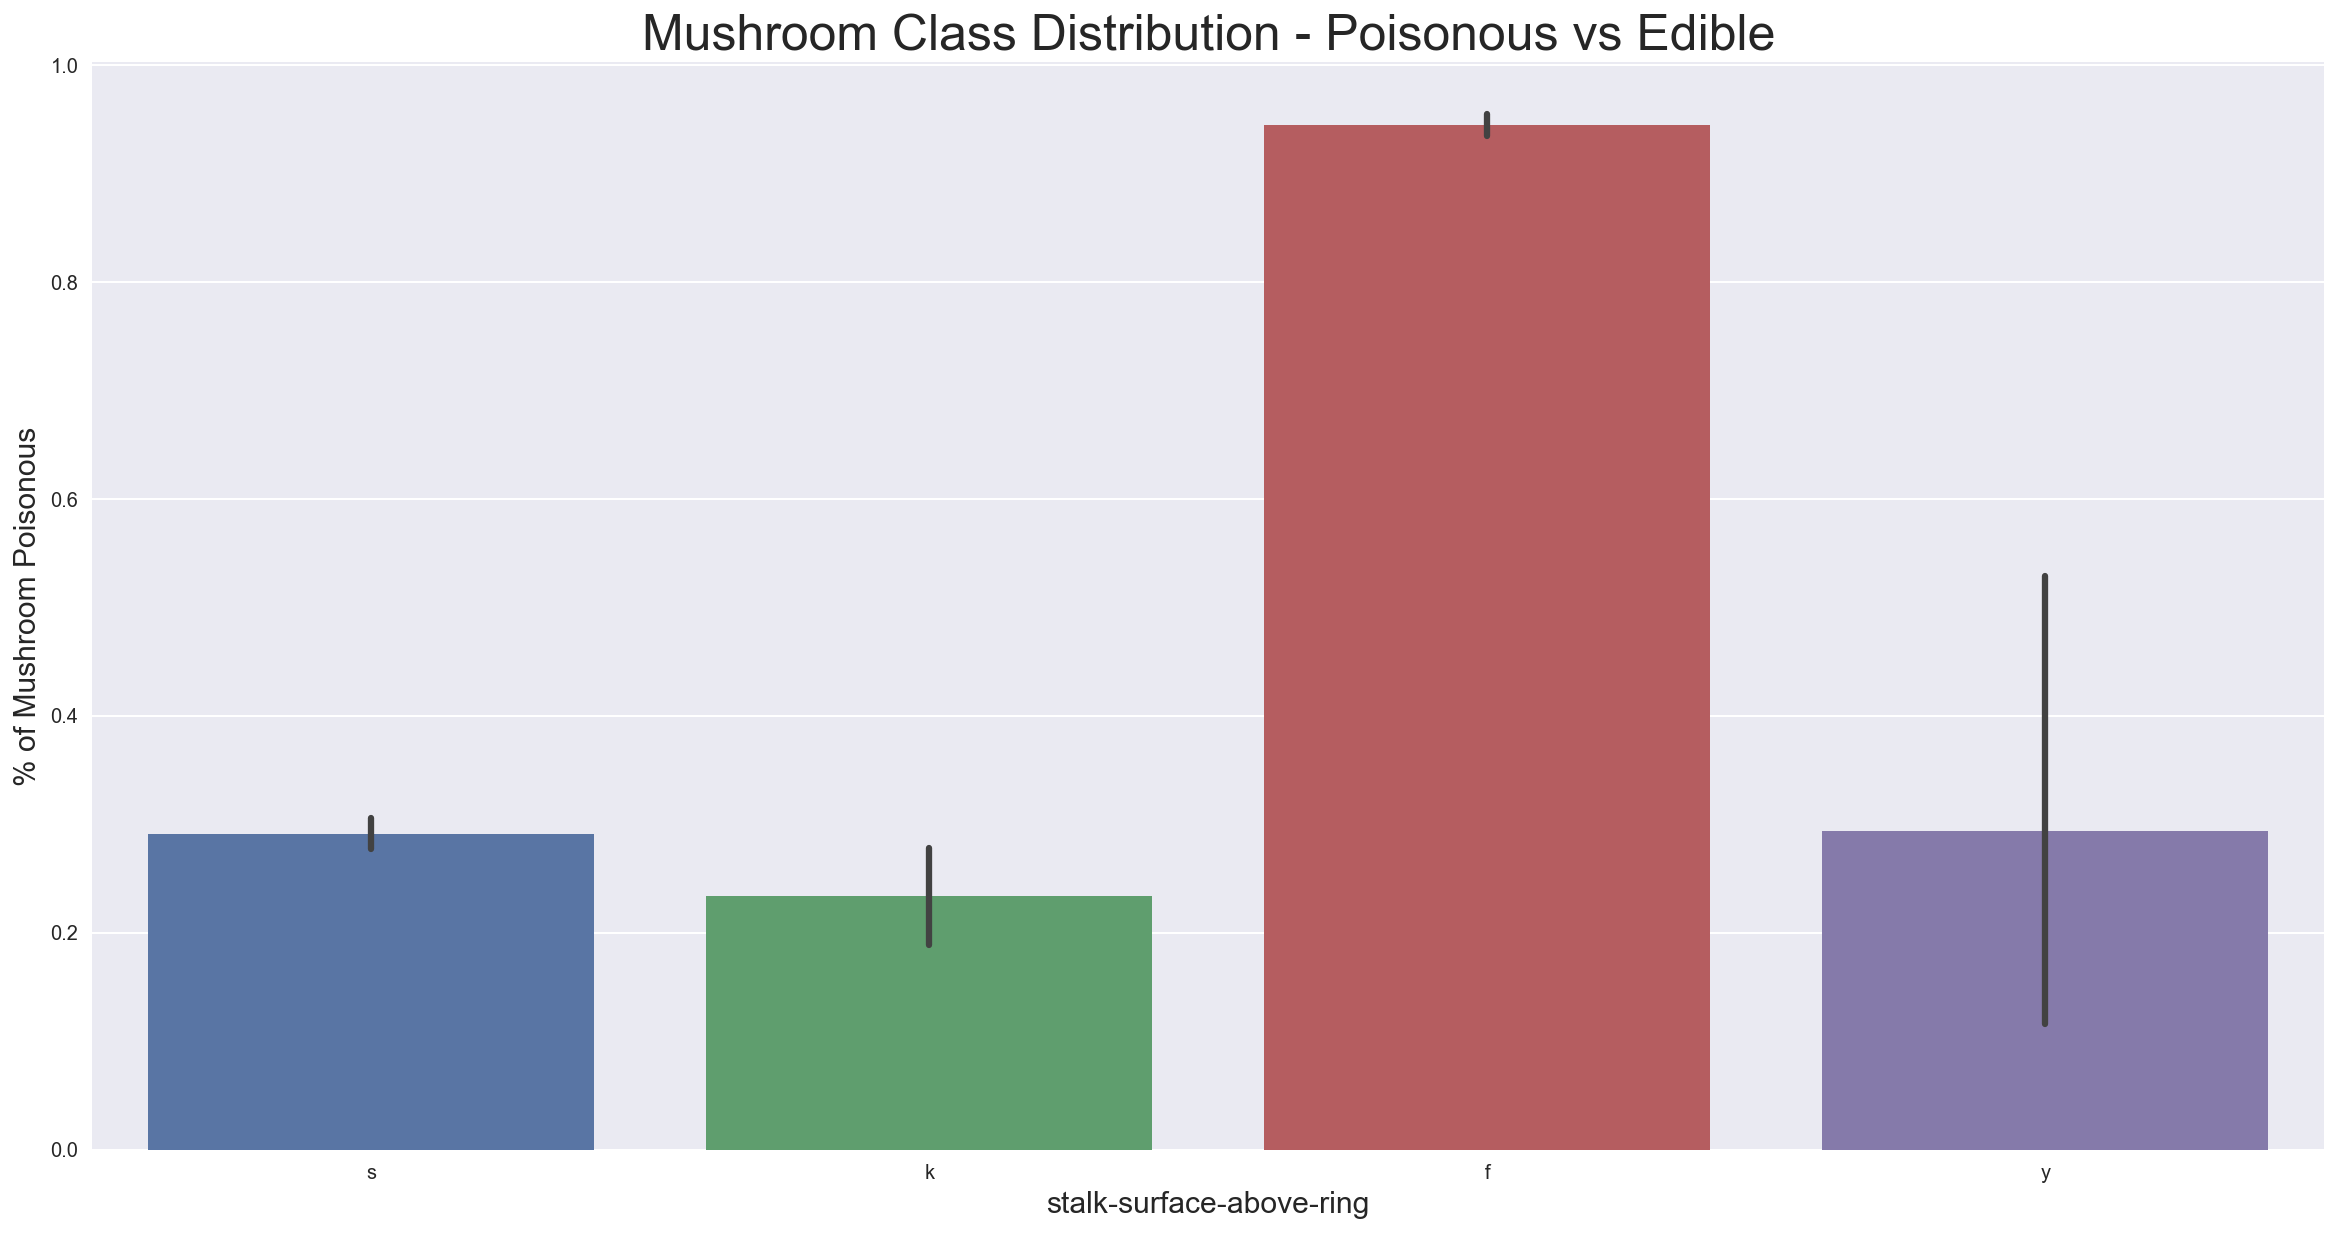

In [44]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "stalk-surface-above-ring", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("stalk-surface-above-ring", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['s','k','f','y']
val = [0, 1,2,3]
plt.xticks(val, labels);

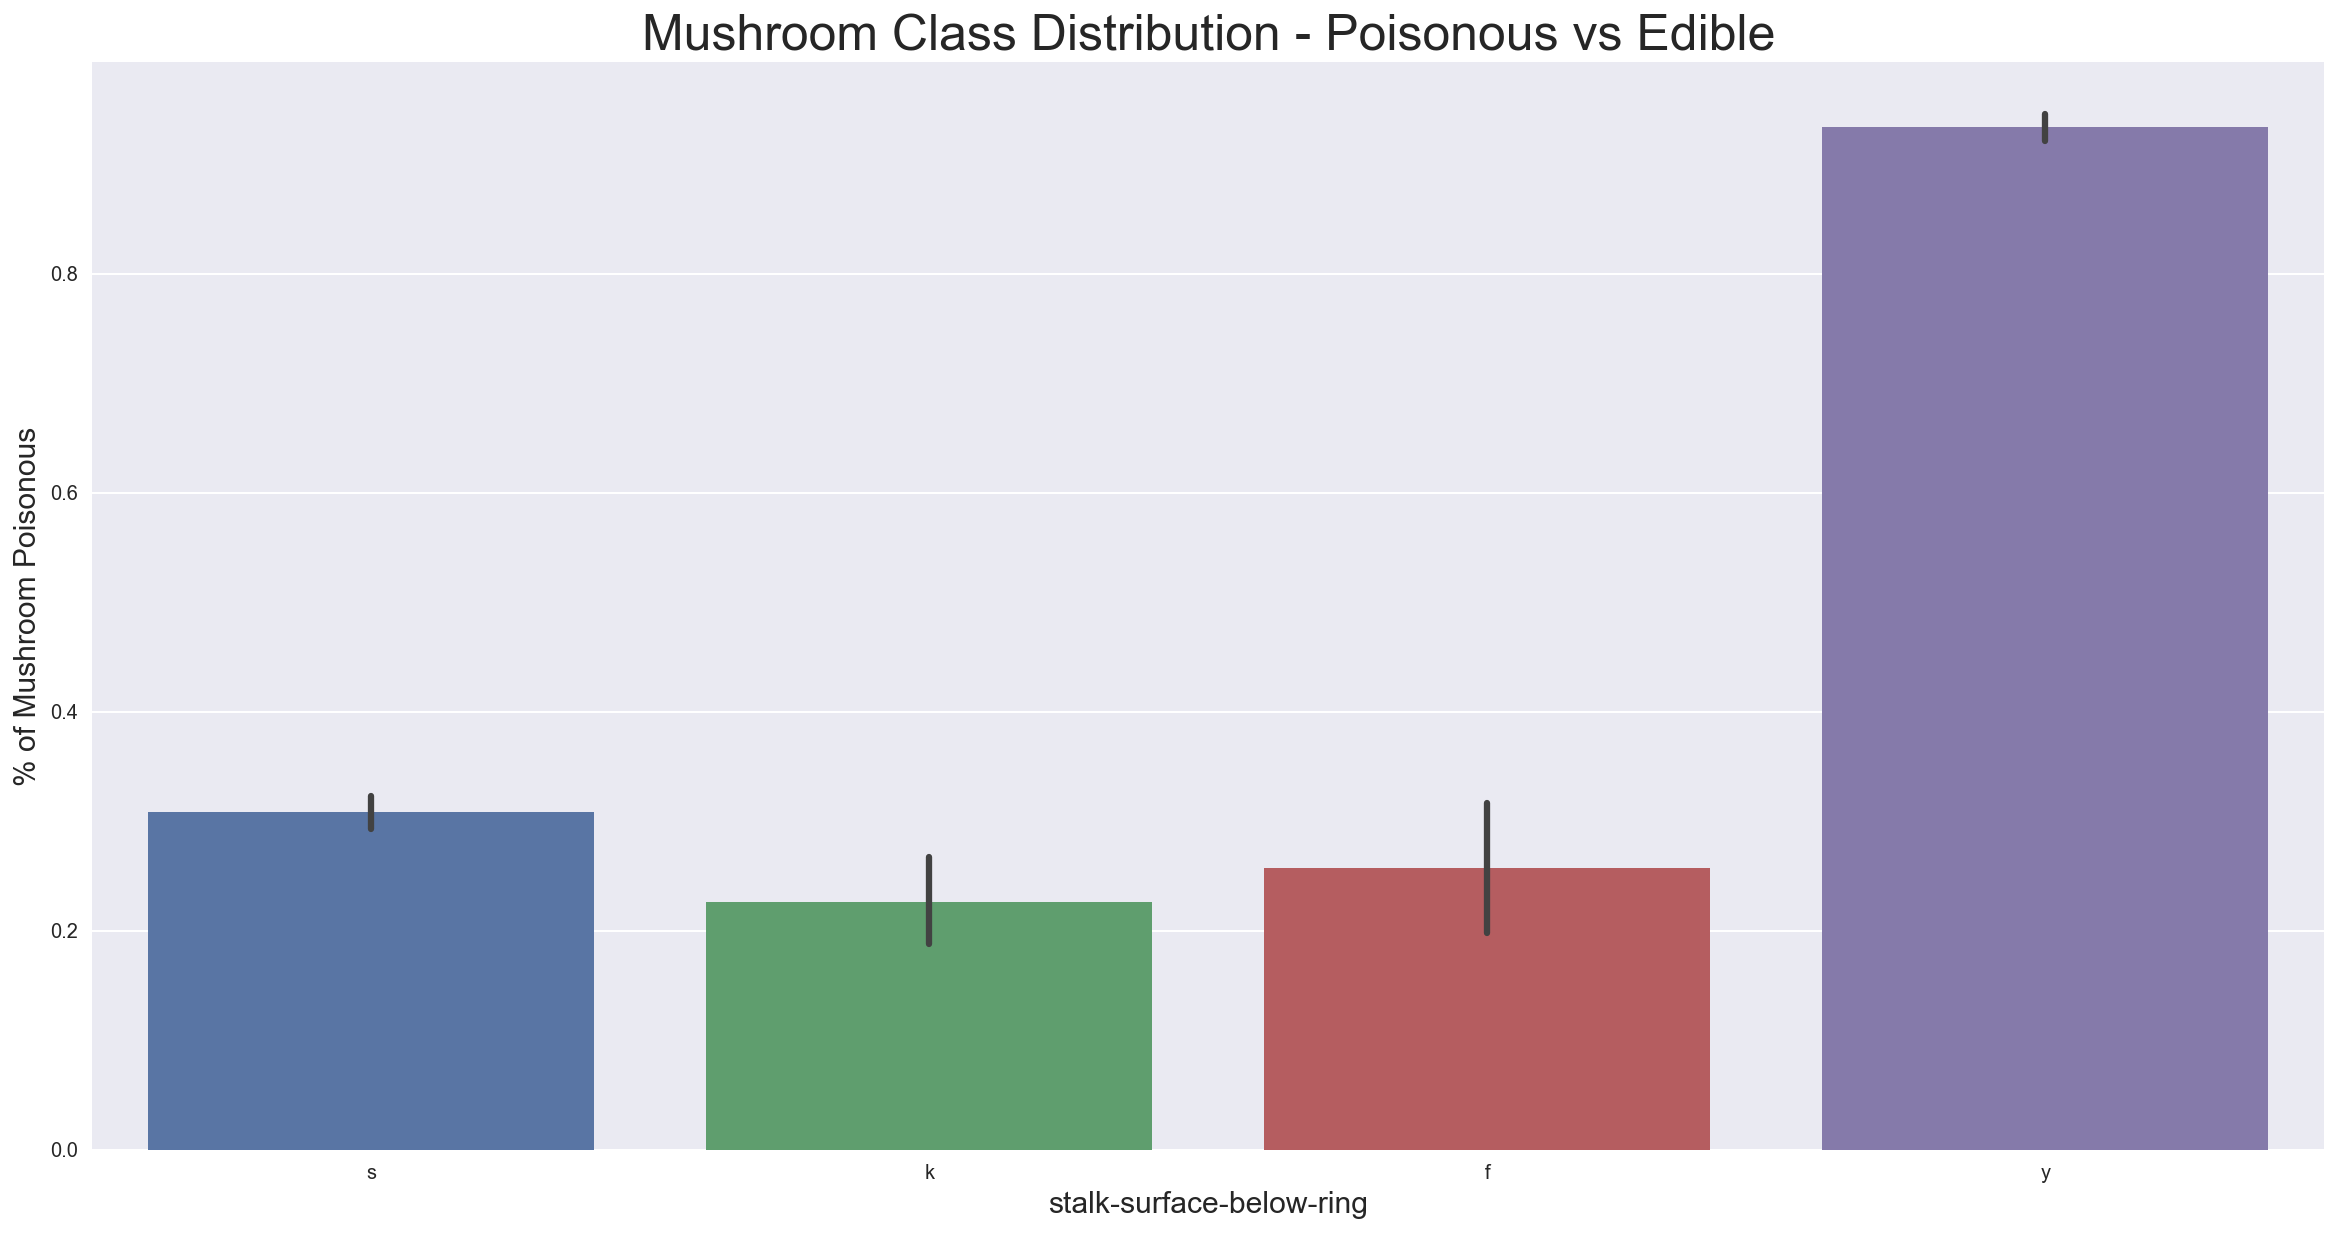

In [45]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "stalk-surface-below-ring", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("stalk-surface-below-ring", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['s','k','f','y']
val = [0, 1,2,3]
plt.xticks(val, labels);

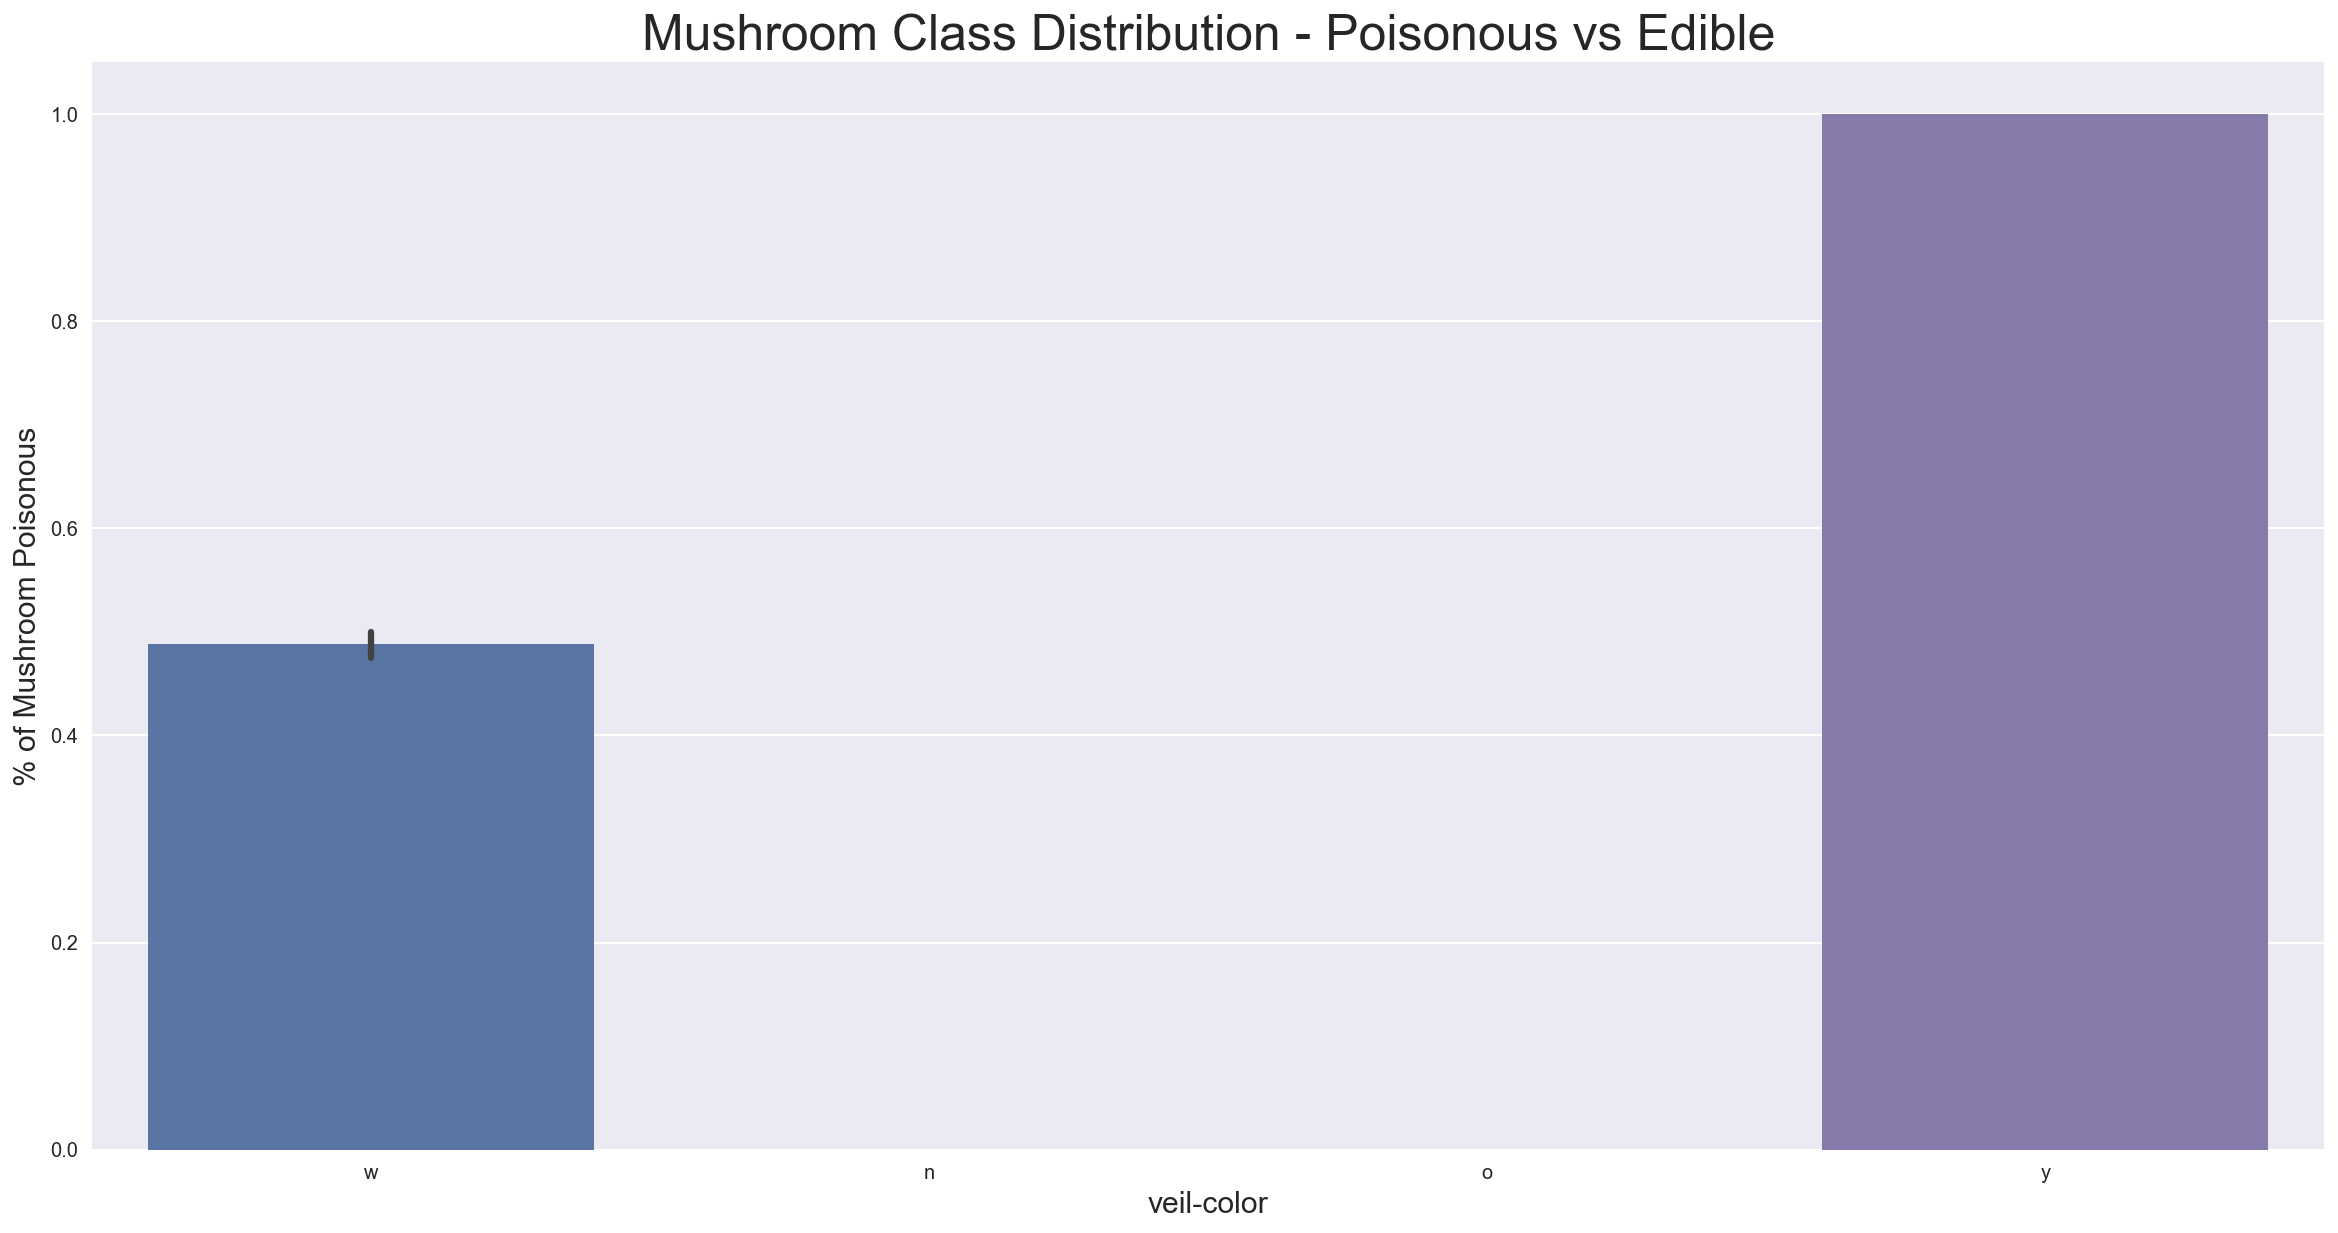

In [46]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "veil-color", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("veil-color", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['w','n','o', 'y']
val = [0, 1,2, 3]
plt.xticks(val, labels);

#### The percentage of w occupied the largest, however the other categories of the feature skewed seriously, we discard this feature.

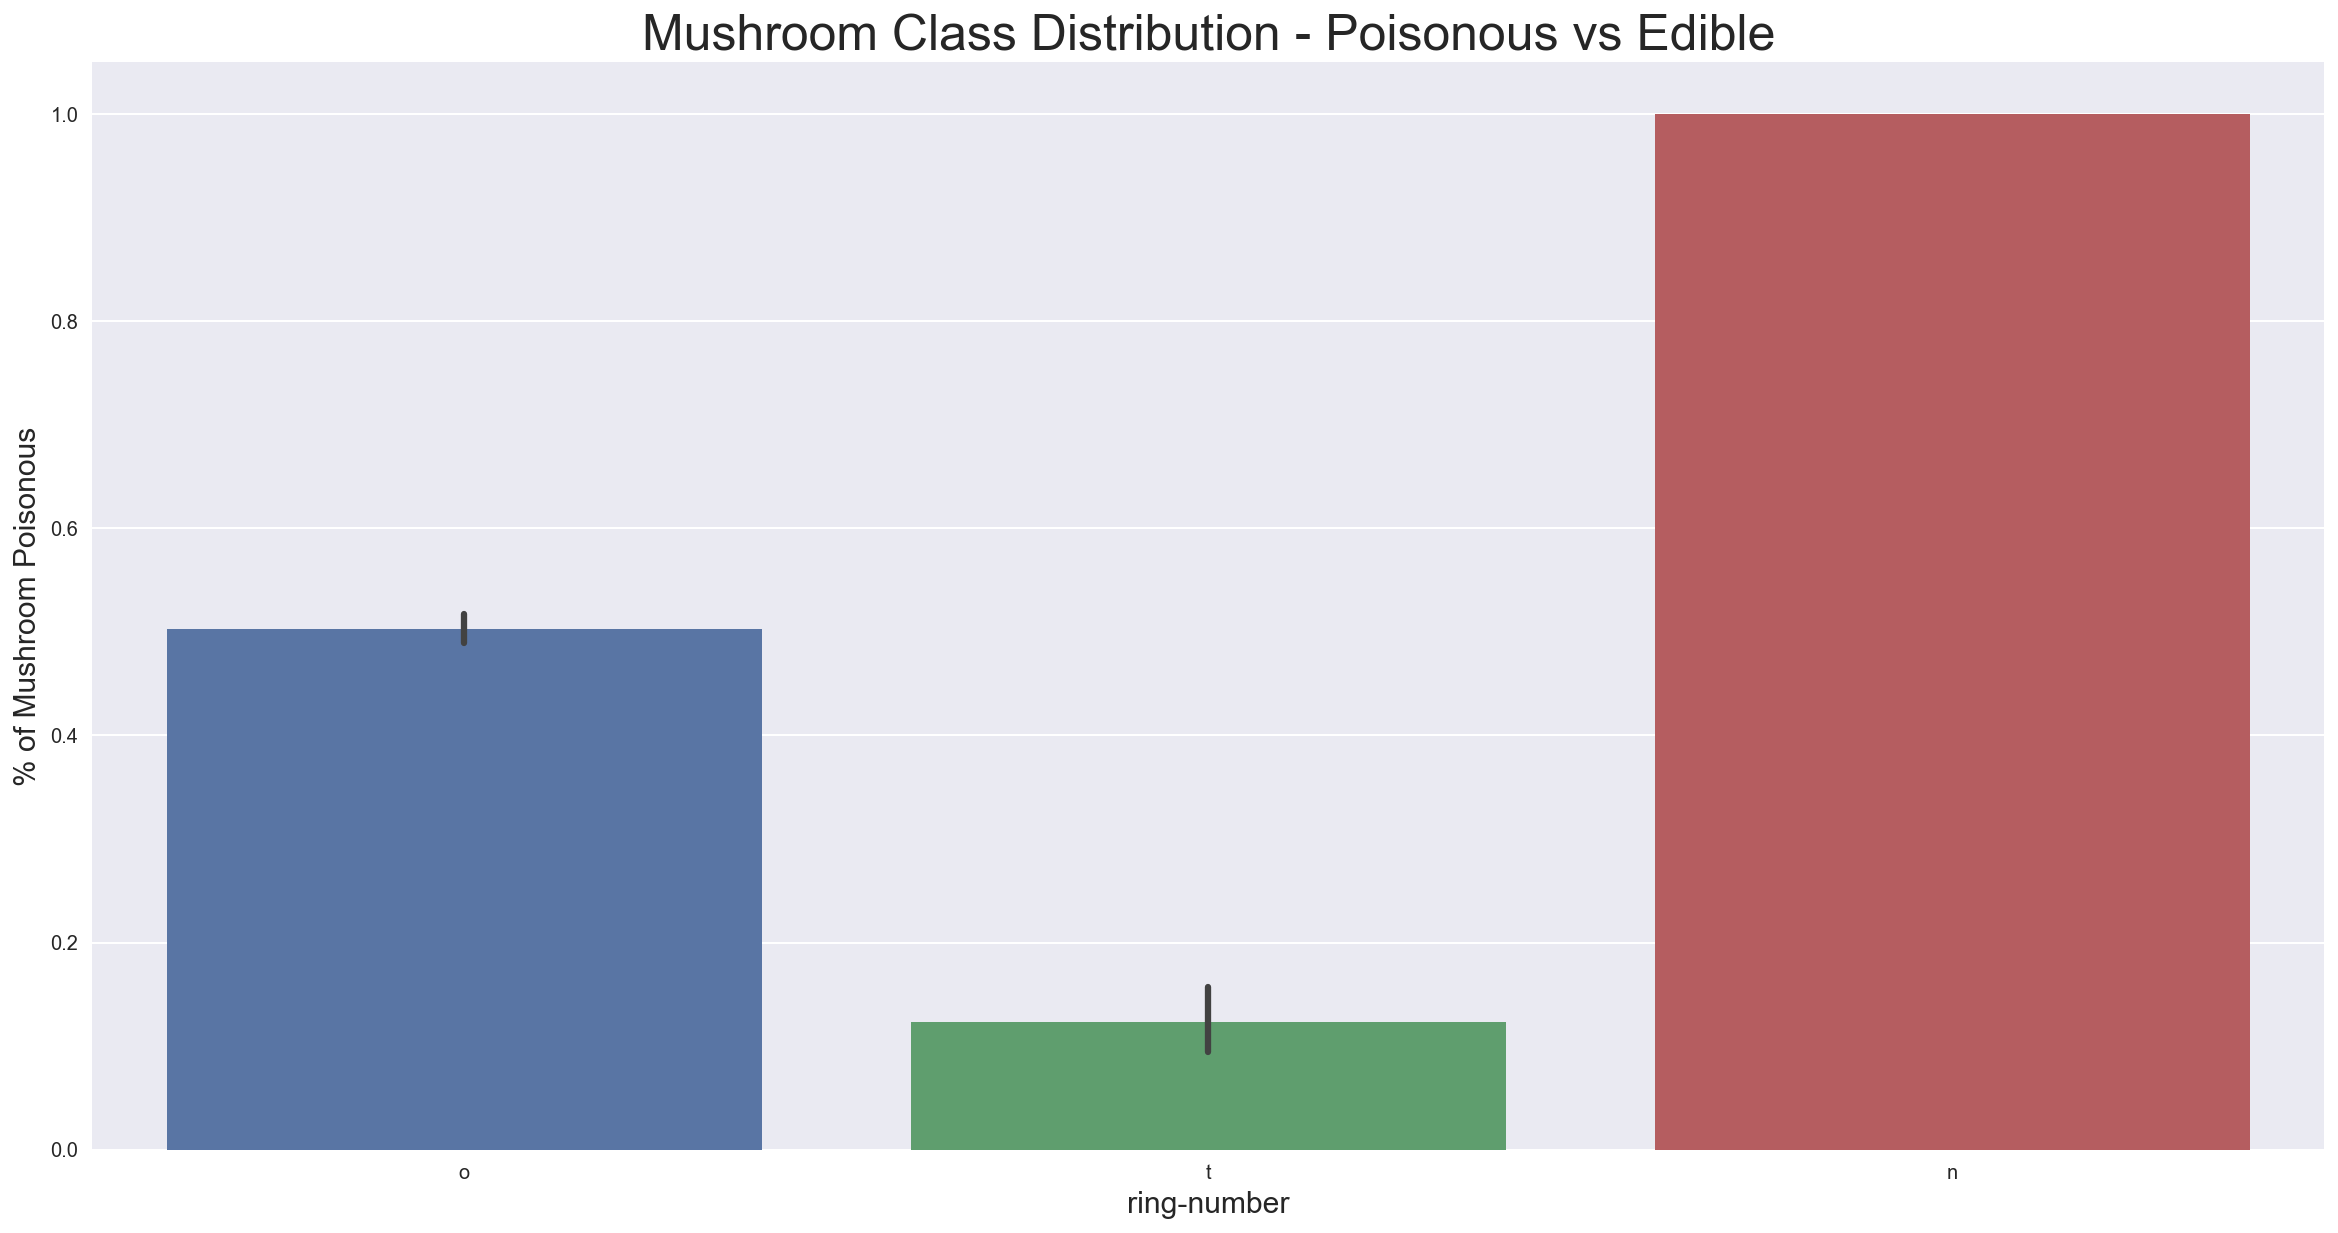

In [47]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "ring-number", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("ring-number", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['o','t','n']
val = [0, 1,2]
plt.xticks(val, labels);

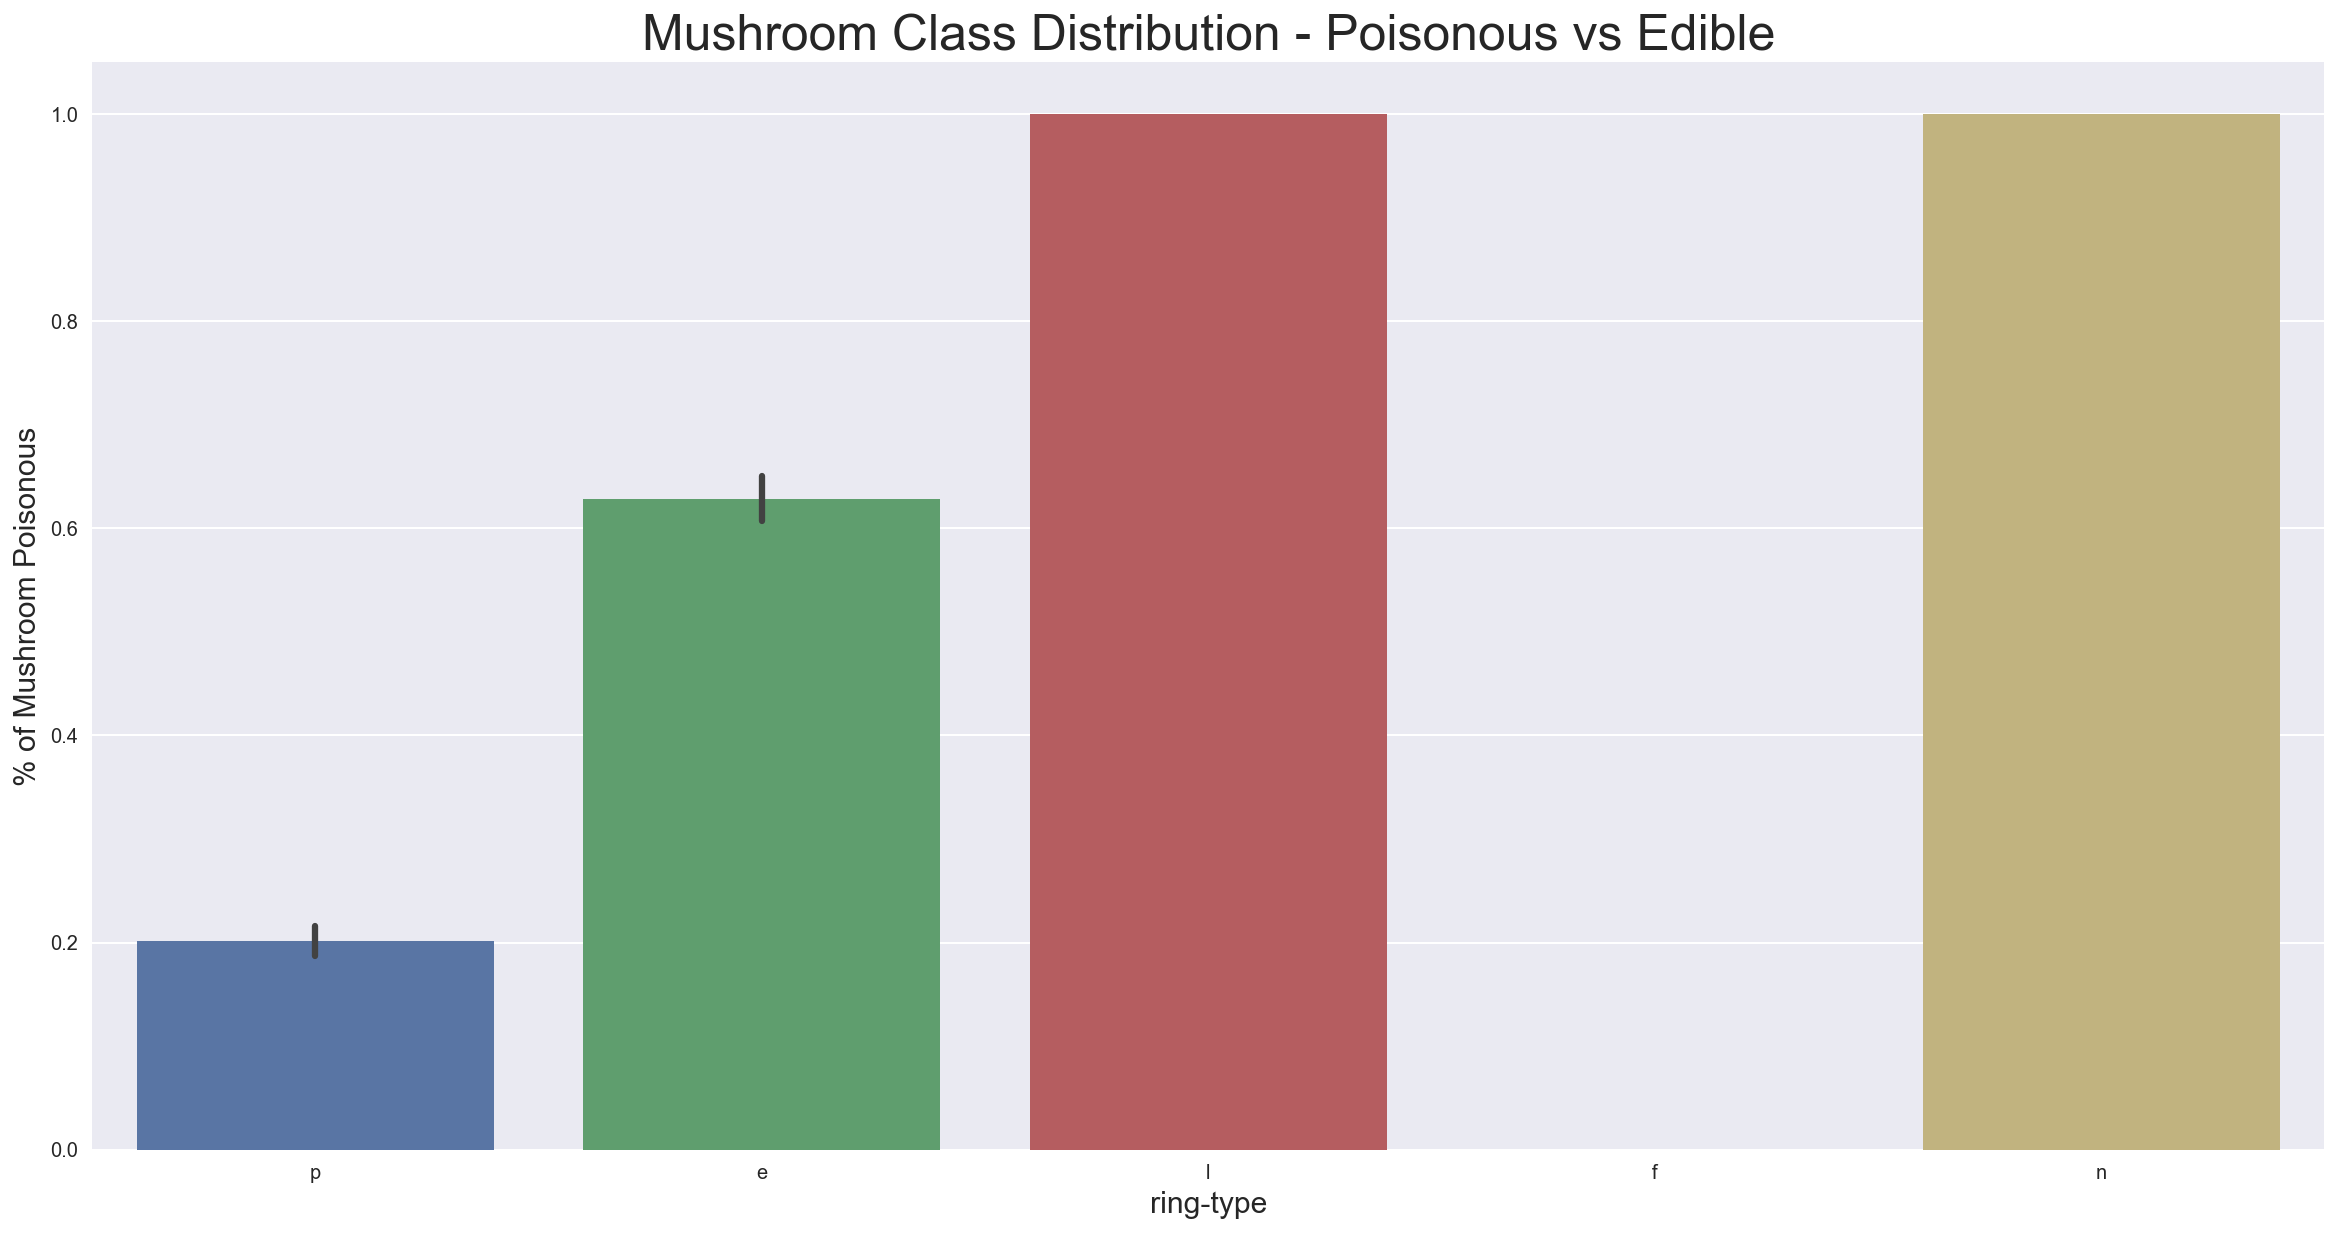

In [48]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "ring-type", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("ring-type", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['p','e','l','f','n']
val = [0, 1,2,3,4]
plt.xticks(val, labels);

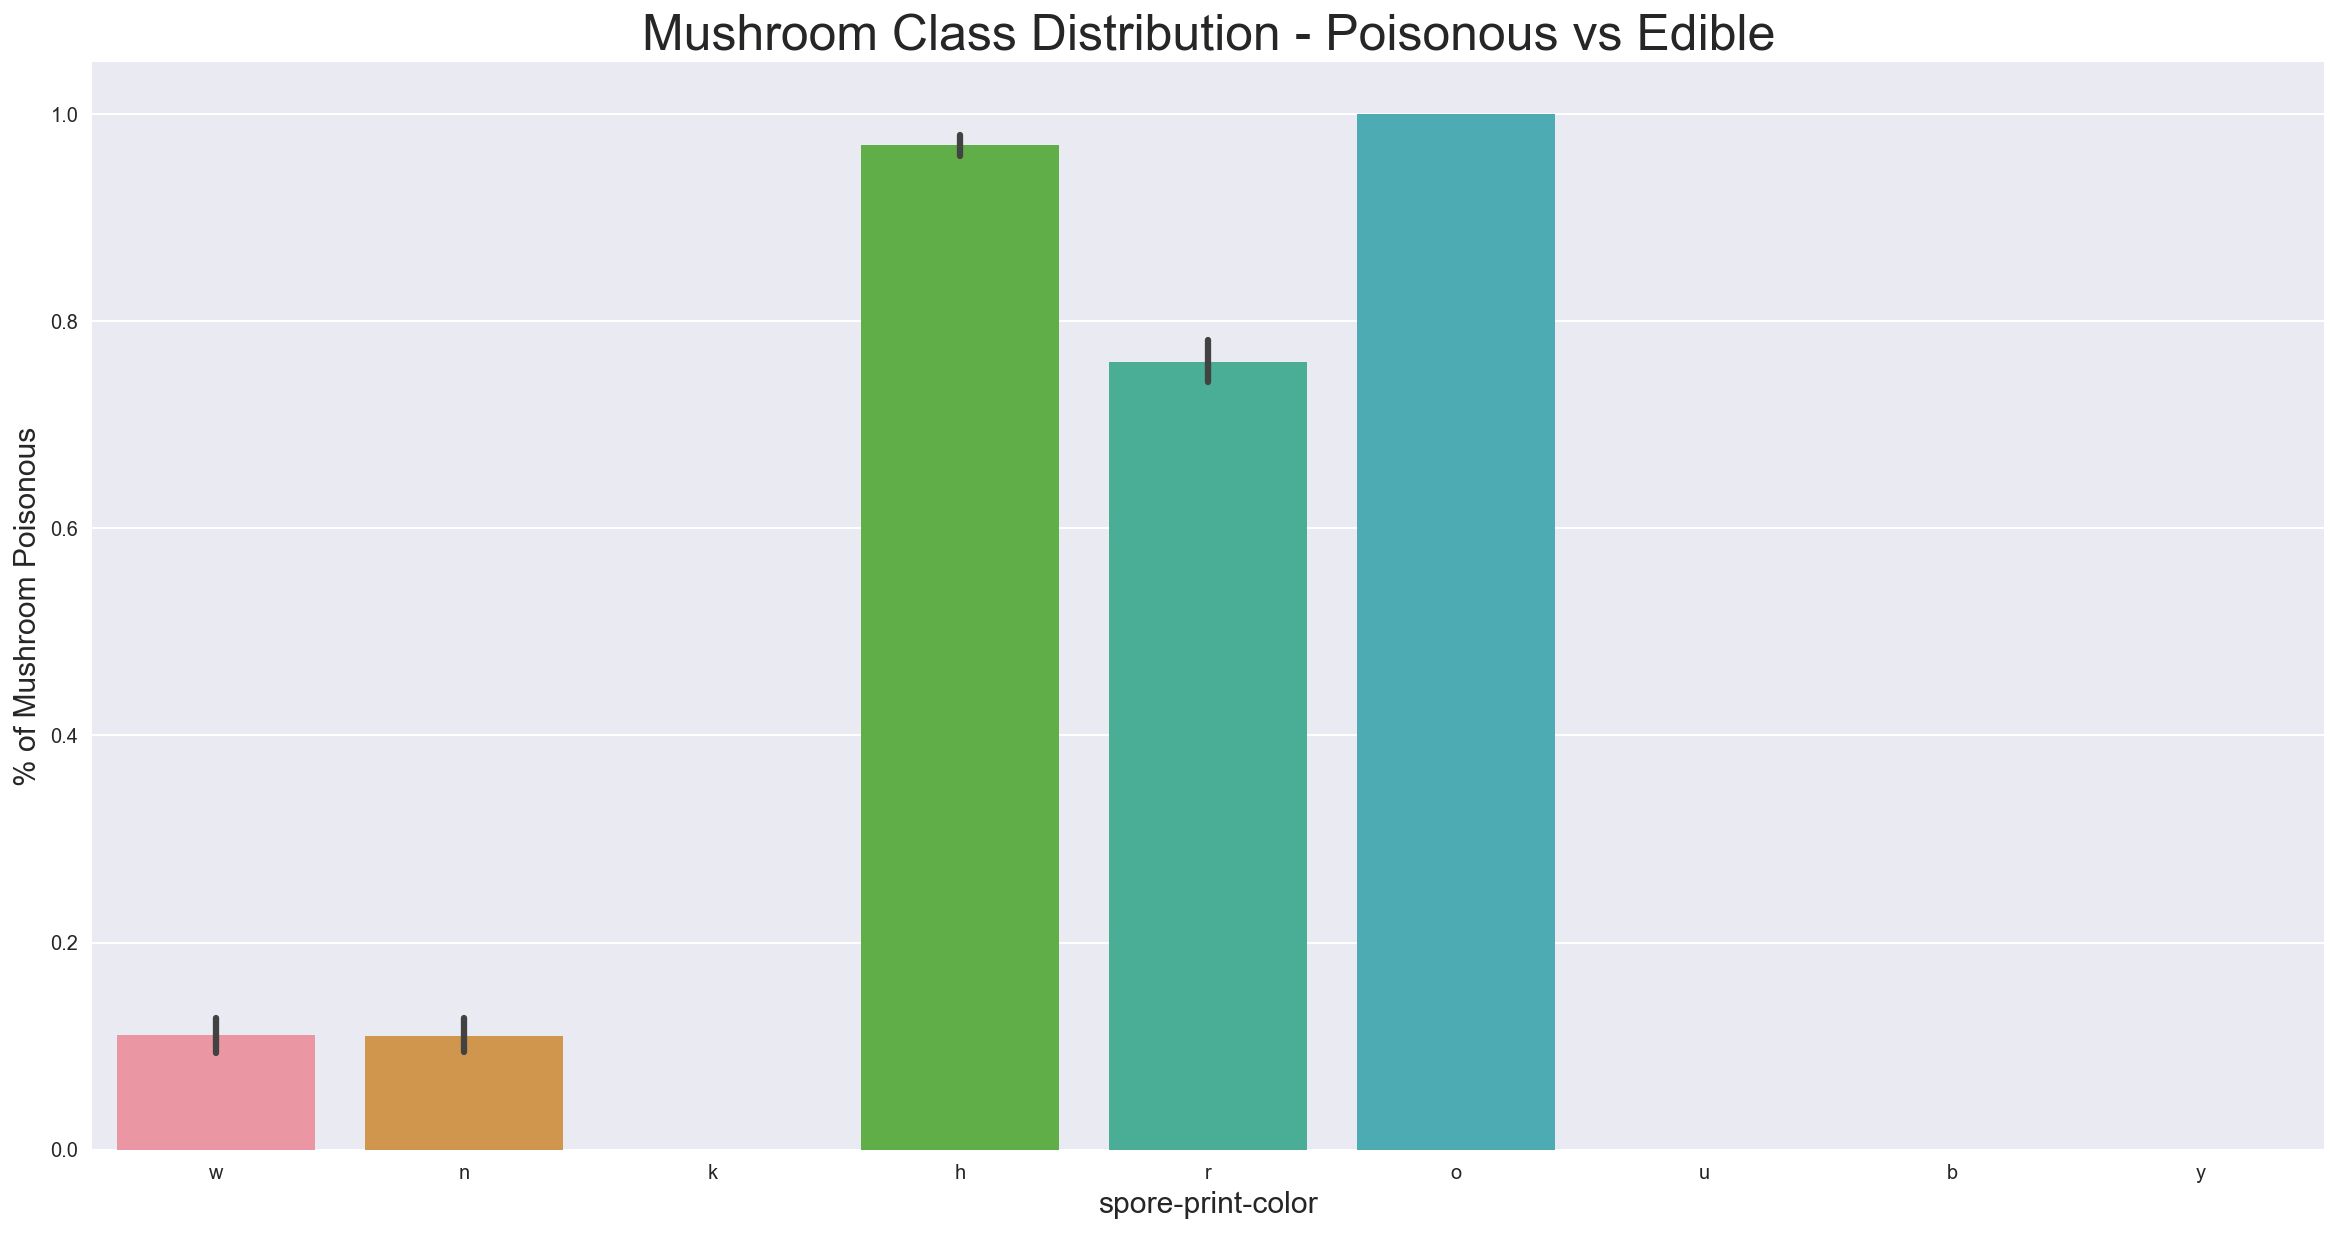

In [49]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "spore-print-color", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("spore-print-color", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['w','n','k','h','r','o','u','b','y']
val = [0, 1,2,3,4,5,6,7,8]
plt.xticks(val, labels);

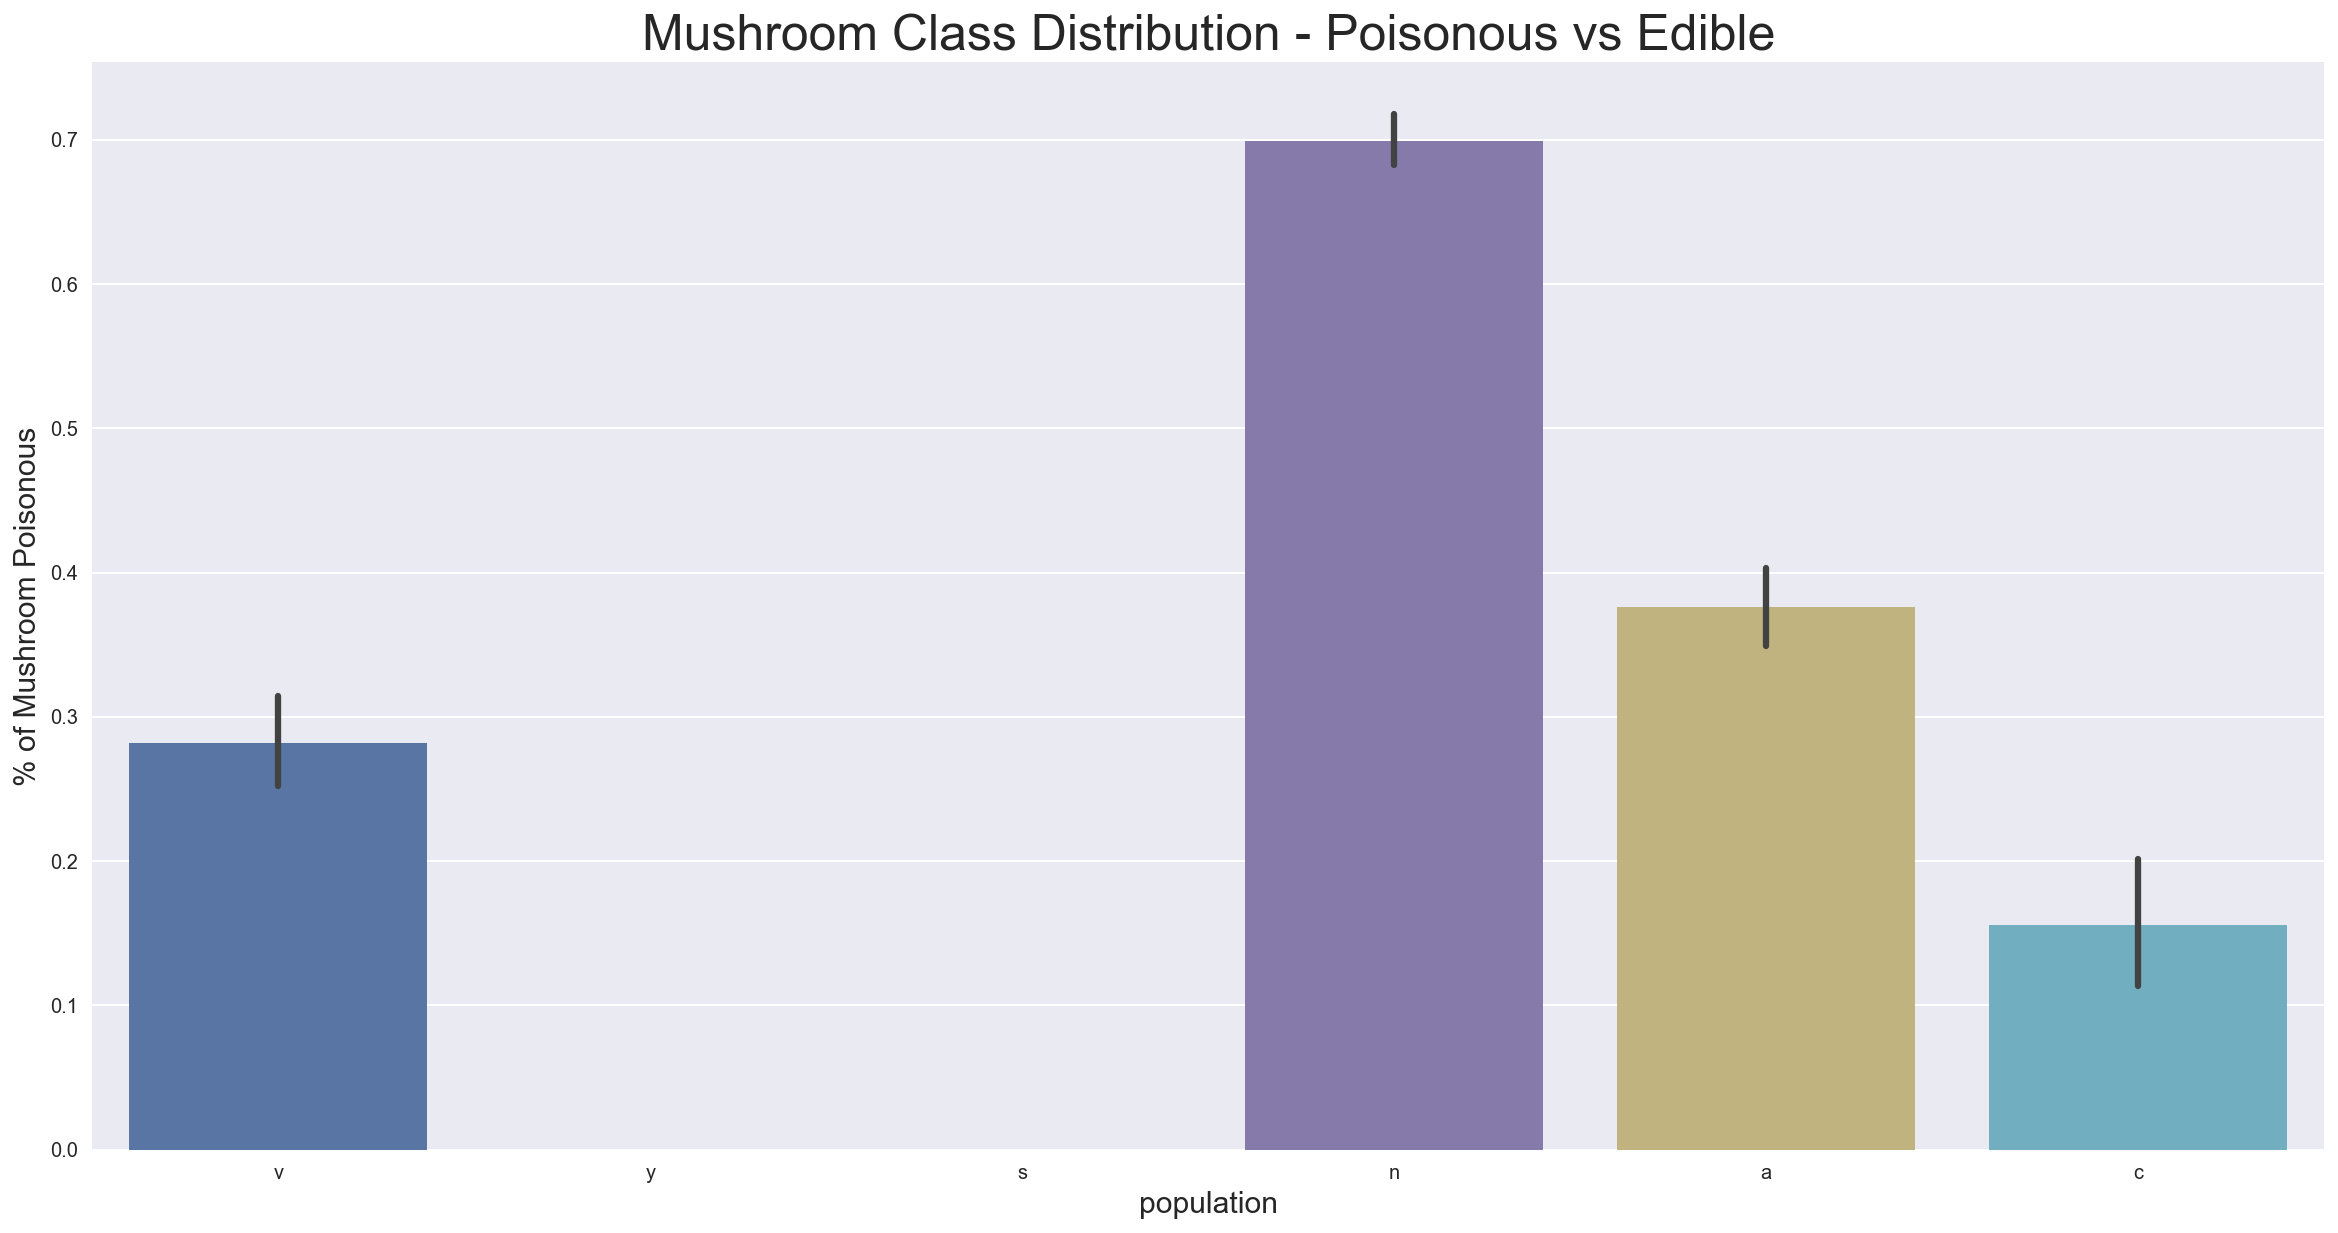

In [50]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "population", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("population", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['v','y','s','n','a','c']
val = [0, 1,2,3,4,5]
plt.xticks(val, labels);

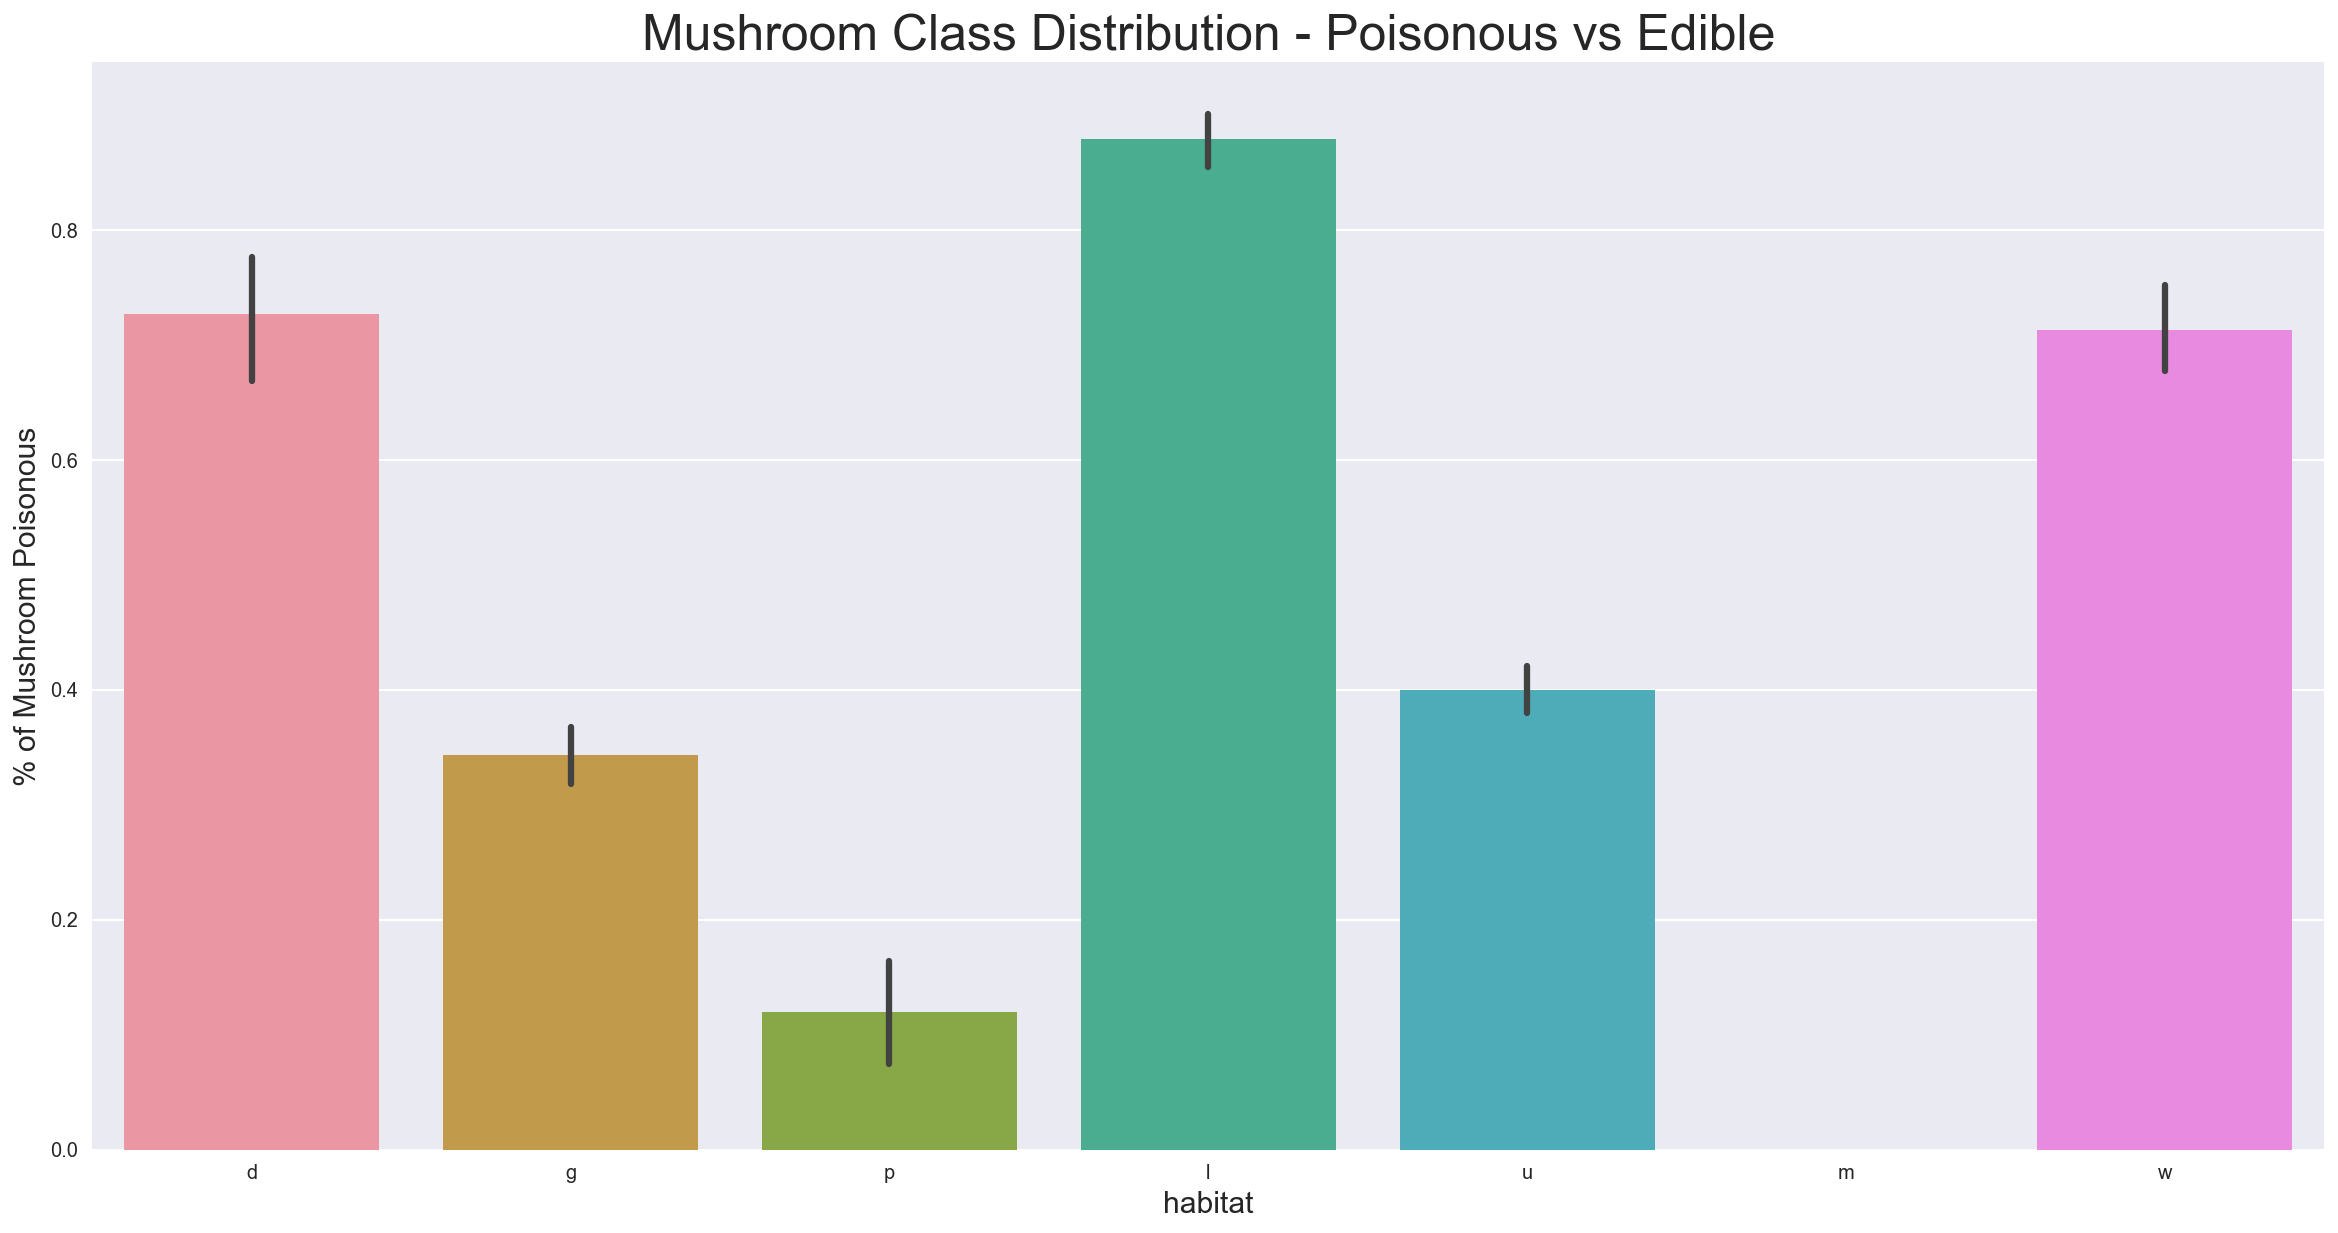

In [51]:
plt.subplots(figsize = (20, 10))
sns.barplot(x = "habitat", 
           y = "class", 
           data = train_copy,
           linewidth = 2)
plt.title("Mushroom Class Distribution - Poisonous vs Edible", fontsize = 25)
plt.xlabel("habitat", fontsize = 15);
plt.ylabel("% of Mushroom Poisonous", fontsize = 15);
labels = ['d','g','p','l','u','m','w']
val = [0, 1,2,3,4,5,6]
plt.xticks(val, labels);

### Based on the data visualization of the features, the features "odor", "veil-type" and "veil-color" should be discarded.

# Part 4: Statistical Overview

### Train Info

In [52]:
train_copy.describe()

,Id
count,5657.000000
mean,4028.688351
std,2334.652887
min,0.000000
25%,2007.000000
50%,4012.000000
75%,6042.000000
max,8123.000000


In [53]:
# Convert class category as float datatype
train_copy['class'] = train_copy['class'].astype(int)

In [54]:
# Overview Poisonous vs edible
train_copy[['cap-shape', 'class']].groupby('cap-shape').mean().reset_index()

,cap-shape,class
0,b,0.103679
1,c,1.000000
2,f,0.487528
3,k,0.714286
4,s,0.000000
5,x,0.465243


In [55]:
# Overview (poisonous vs edible)
poisonous_summary = train_copy.groupby("class")
poisonous_summary.mean().reset_index()

,class,Id
0,0,2837.520636
1,1,5332.313588


Because all the features are categorical, there is no need to show combined features further!

### Based on the data visualization and analysis, we decide to discard the feature "odor", "veil-type" and "veil-color", and in order to make the experiements be simpler, we just simply encode the categorical features (Not with one hot encoding).

In [56]:
train_copy.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
0,1,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,0,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1


In [57]:
# Encode cap-shape
train_copy['cap-shape'] = train_copy['cap-shape'].apply(lambda x: 0 if x == 'x' else (1 if x == 'f' else (2 if x == 'k' else (3 if x == 'b' else (4 if x == 's' else 5)))))
test_copy['cap-shape'] = test_copy['cap-shape'].apply(lambda x: 0 if x == 'x' else (1 if x == 'f' else (2 if x == 'k' else (3 if x == 'b' else (4 if x == 's' else 5)))))

In [58]:
# Encode cap-surface
train_copy['cap-surface'] = train_copy['cap-surface'].apply(lambda x: 0 if x == 'y' else (1 if x == 's' else (2 if x == 'f' else 3)))
test_copy['cap-surface'] = test_copy['cap-surface'].apply(lambda x: 0 if x == 'y' else (1 if x == 's' else (2 if x == 'f' else 3)))

In [59]:
# Encode cap-color
train_copy['cap-color'] = train_copy['cap-color'].apply(lambda x: 0 if x == 'n' else (1 if x == 'g' else (2 if x == 'e' else (3 if x == 'y' else (4 if x == 'w' else (5 if x == 'b' else ( 6 if x == 'p' else (7 if x == 'c' else (8 if x == 'r' else 9)))))))))
test_copy['cap-color'] = test_copy['cap-color'].apply(lambda x: 0 if x == 'n' else (1 if x == 'g' else (2 if x == 'e' else (3 if x == 'y' else (4 if x == 'w' else (5 if x == 'b' else ( 6 if x == 'p' else (7 if x == 'c' else (8 if x == 'r' else 9)))))))))

In [60]:
# Encode bruises
train_copy['bruises'] = train_copy['bruises'].apply(lambda x: 0 if x == 'f' else 1)
test_copy['bruises'] = test_copy['bruises'].apply(lambda x: 0 if x == 'f' else 1)

In [61]:
# Encode gill-attachment
train_copy['gill-attachment'] = train_copy['gill-attachment'].apply(lambda x: 0 if x == 'f' else 1)
test_copy['gill-attachment'] = test_copy['gill-attachment'].apply(lambda x: 0 if x == 'f' else 1)

In [62]:
# Encode gill-attachment
train_copy['gill-spacing'] = train_copy['gill-spacing'].apply(lambda x: 0 if x == 'c' else 1)
test_copy['gill-spacing'] = test_copy['gill-spacing'].apply(lambda x: 0 if x == 'c' else 1)

In [63]:
# Encode gill-size
train_copy['gill-size'] = train_copy['gill-size'].apply(lambda x: 0 if x == 'b' else 1)
test_copy['gill-size'] = test_copy['gill-size'].apply(lambda x: 0 if x == 'b' else 1)

In [64]:
# Encode gill-color
train_copy['gill-color'] = train_copy['gill-color'].apply(lambda x: 0 if x == 'b' else (1 if x == 'p' else (2 if x == 'w' else (3 if x == 'n' else (4 if x == 'g' else (5 if x == 'h' else ( 6 if x == 'u' else (7 if x == 'k' else (8 if x == 'e' else (9 if x == 'y' else (10 if x == 'o' else 11)))))))))))
test_copy['gill-color'] = test_copy['gill-color'].apply(lambda x: 0 if x == 'b' else (1 if x == 'p' else (2 if x == 'w' else (3 if x == 'n' else (4 if x == 'g' else (5 if x == 'h' else ( 6 if x == 'u' else (7 if x == 'k' else (8 if x == 'e' else (9 if x == 'y' else (10 if x == 'o' else 11)))))))))))

In [65]:
# Encode stalk-shape
train_copy['stalk-shape'] = train_copy['stalk-shape'].apply(lambda x: 0 if x == 't' else 1)
test_copy['stalk-shape'] = test_copy['stalk-shape'].apply(lambda x: 0 if x == 't' else 1)

In [66]:
# Encode stalk-surface-above-ring
train_copy['stalk-surface-above-ring'] = train_copy['stalk-surface-above-ring'].apply(lambda x: 0 if x == 's' else (1 if x == 'k' else (2 if x == 'f' else 3)))
test_copy['stalk-surface-above-ring'] = test_copy['stalk-surface-above-ring'].apply(lambda x: 0 if x == 's' else (1 if x == 'k' else (2 if x == 'f' else 3)))

In [67]:
# Encode stalk-surface-above-ring
train_copy['stalk-surface-below-ring'] = train_copy['stalk-surface-below-ring'].apply(lambda x: 0 if x == 's' else (1 if x == 'k' else (2 if x == 'f' else 3)))
test_copy['stalk-surface-below-ring'] = test_copy['stalk-surface-below-ring'].apply(lambda x: 0 if x == 's' else (1 if x == 'k' else (2 if x == 'f' else 3)))

In [68]:
# Encode stalk-color-above-ring
train_copy['stalk-color-above-ring'] = train_copy['stalk-color-above-ring'].apply(lambda x: 0 if x == 'w' else (1 if x == 'p' else (2 if x == 'g' else (3 if x == 'n' else (4 if x == 'b' else (5 if x == 'o' else (6 if x == 'e' else (7 if x == 'c' else 8))))) )))
test_copy['stalk-color-above-ring'] = test_copy['stalk-color-above-ring'].apply(lambda x: 0 if x == 'w' else (1 if x == 'p' else (2 if x == 'g' else (3 if x == 'n' else (4 if x == 'b' else (5 if x == 'o' else (6 if x == 'e' else (7 if x == 'c' else 8))))) )))

In [69]:
# Encode stalk-color-below-ring
train_copy['stalk-color-below-ring'] = train_copy['stalk-color-below-ring'].apply(lambda x: 0 if x == 'w' else (1 if x == 'p' else (2 if x == 'g' else (3 if x == 'n' else (4 if x == 'b' else (5 if x == 'o' else (6 if x == 'e' else (7 if x == 'c' else 8))))) )))
test_copy['stalk-color-below-ring'] = test_copy['stalk-color-below-ring'].apply(lambda x: 0 if x == 'w' else (1 if x == 'p' else (2 if x == 'g' else (3 if x == 'n' else (4 if x == 'b' else (5 if x == 'o' else (6 if x == 'e' else (7 if x == 'c' else 8))))) )))

In [70]:
# Encode ring-number
train_copy['ring-number'] = train_copy['ring-number'].apply(lambda x: 0 if x == 'o' else (1 if x == 't' else 2))
test_copy['ring-number'] = test_copy['ring-number'].apply(lambda x: 0 if x == 'o' else (1 if x == 't' else 2))

In [71]:
# Encode ring-type
train_copy['ring-type'] = train_copy['ring-type'].apply(lambda x: 0 if x == 'p' else (1 if x == 'e' else (2 if x == 'l' else (3 if x == 'f' else 4))))
test_copy['ring-type'] = test_copy['ring-type'].apply(lambda x: 0 if x == 'p' else (1 if x == 'e' else (2 if x == 'l' else (3 if x == 'f' else 4))))

In [72]:
# Encode spore-print-color
train_copy['spore-print-color'] = train_copy['spore-print-color'].apply(lambda x: 0 if x == 'w' else (1 if x == 'n' else (2 if x == 'k' else (3 if x == 'h' else (4 if x == 'r' else (5 if x == 'o' else ( 6 if x == 'u' else (7 if x == 'b' else 8))))))))
test_copy['spore-print-color'] = test_copy['spore-print-color'].apply(lambda x: 0 if x == 'w' else (1 if x == 'n' else (2 if x == 'k' else (3 if x == 'h' else (4 if x == 'r' else (5 if x == 'o' else ( 6 if x == 'u' else (7 if x == 'b' else 8))))))))

In [73]:
# Encode population
train_copy['population'] = train_copy['population'].apply(lambda x: 0 if x == 'v' else (1 if x == 'y' else (2 if x == 's' else (3 if x == 'n' else (4 if x == 'a' else 5)))))
test_copy['population'] = test_copy['population'].apply(lambda x: 0 if x == 'v' else (1 if x == 'y' else (2 if x == 's' else (3 if x == 'n' else (4 if x == 'a' else 5)))))

In [74]:
# Encode habitat
train_copy['habitat'] = train_copy['habitat'].apply(lambda x: 0 if x == 'd' else (1 if x == 'g' else (2 if x == 'p' else (3 if x == 'l' else (4 if x == 'u' else (5 if x == 'm' else 6))))))
test_copy['habitat'] = test_copy['habitat'].apply(lambda x: 0 if x == 'd' else (1 if x == 'g' else (2 if x == 'p' else (3 if x == 'l' else (4 if x == 'u' else (5 if x == 'm' else 6))))))

### 4a. Coorelation Matrix and Heatmap

In [75]:
pd.DataFrame(abs(train_copy.corr()['class']).sort_values(ascending = False))

,class
class,1.000000
ring-type,0.557904
gill-size,0.534139
Id,0.533800
bruises,0.501366
population,0.443273
gill-spacing,0.350904
gill-color,0.340364
stalk-surface-above-ring,0.322045
stalk-surface-below-ring,0.176034


#### Squaring the correlation feature not only gives on positive correlations but also amplifies the relationships

In [76]:
corr = train_copy.corr()**2
corr['class'].sort_values(ascending=False)

class                       1.000000
ring-type                   0.311257
gill-size                   0.285304
Id                          0.284943
bruises                     0.251368
population                  0.196491
gill-spacing                0.123133
gill-color                  0.115848
stalk-surface-above-ring    0.103713
stalk-surface-below-ring    0.030988
cap-surface                 0.023537
ring-number                 0.021498
stalk-color-below-ring      0.020777
stalk-color-above-ring      0.018027
gill-attachment             0.015936
stalk-shape                 0.012158
habitat                     0.005496
cap-shape                   0.001349
spore-print-color           0.000454
cap-color                   0.000289
Name: class, dtype: float64

In [77]:
# Because Id column is useless, we will not use this feature and the squared correlation which smaller than 0.1 will be discarded
train_copy2 = train_copy[['class','ring-type','gill-size', 'bruises', 'population', 'gill-spacing', 'gill-color', 'stalk-surface-above-ring']]
test_copy2 = train_copy[['class','ring-type','gill-size', 'bruises', 'population', 'gill-spacing', 'gill-color', 'stalk-surface-above-ring']]

In [78]:
train_copy2.head()

,class,ring-type,gill-size,bruises,population,gill-spacing,gill-color,stalk-surface-above-ring
0,1,0,1,1,2,0,7,0
1,0,0,0,1,3,0,7,0
2,0,0,0,1,3,0,3,0
3,1,0,1,1,2,0,3,0
4,0,1,0,0,4,1,7,0


Text(0.5,1.03,'Correlations Among Features')

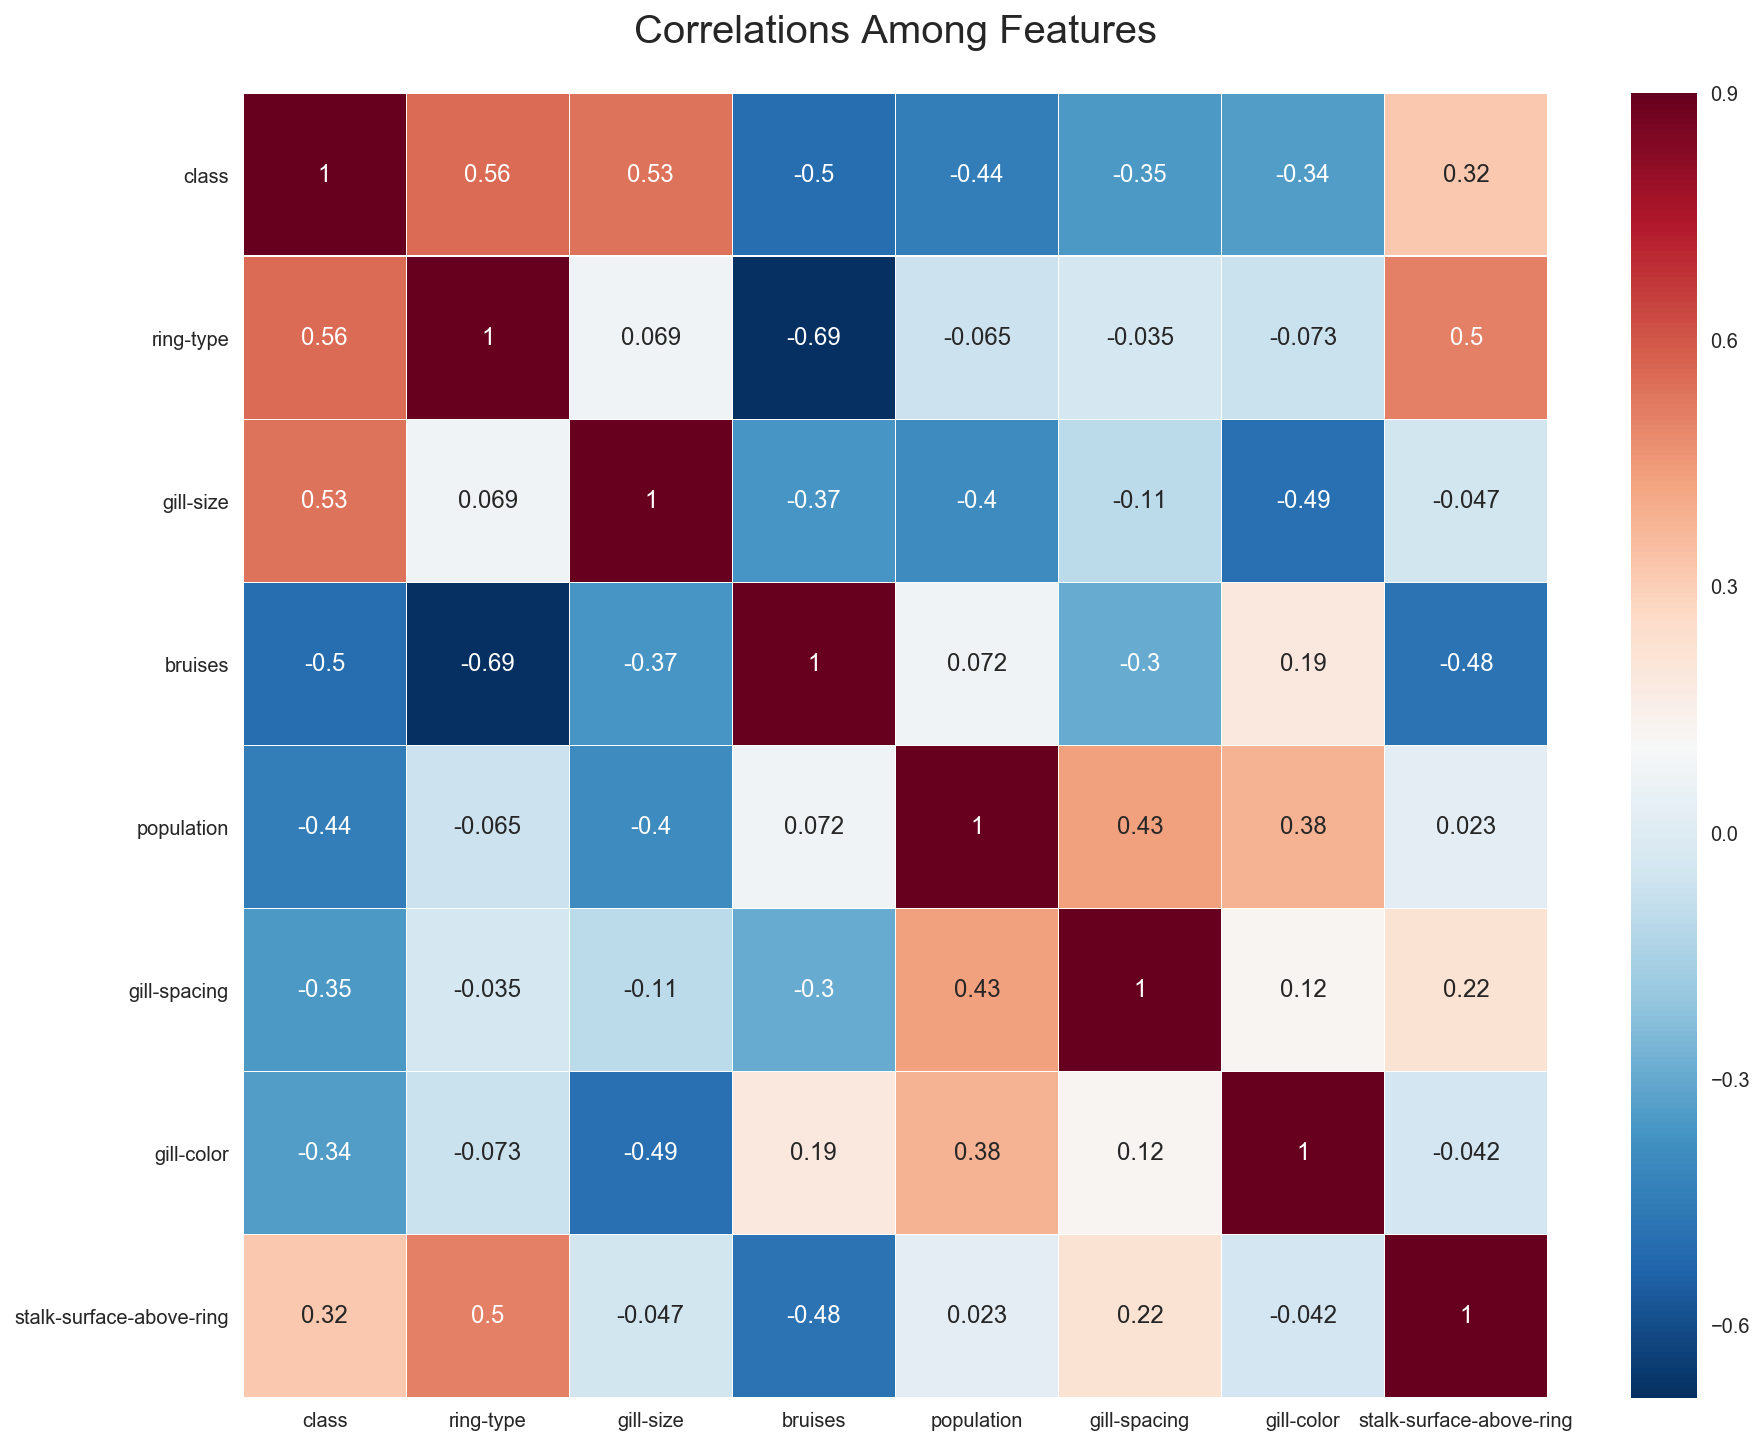

In [79]:
## heatmap to see the correlation between features.
# Gerate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_copy2.corr(), dtype=np.bool)
plt.subplots(figsize = (15, 12))
sns.heatmap(train_copy2.corr(), annot=True, cmap = 'RdBu_r', linewidths=0.1, linecolor='white', vmax=.9, square=True)
plt.title("Correlations Among Features", y = 1.03, fontsize = 20)

#### Positive Correlation Features:
    ring-type: 0.56
    gill-size: 0.53
    stalk-surface-above-ring: 0.32
#### Negatice Correlation Features:
    bruises: -0.5
    population: -0.44
    gill-spacing: -0.35
    gill-color:-0.34

## Part 5: Modeling Tasks

### 5a. Seperating dependent and independent variables

In [80]:
X = train_copy2.drop(['class'], axis = 1)
y = train_copy2['class']

In [81]:
test_x = test_copy2.drop(['class'], axis = 1)
test_y = test_copy2['class']

### 5b. Splitting the training data with cross validation

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0)
X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(), X, y, cv = cv)
print("Cross-Validation accuracy scores:{}".format(accuracies))
print("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.94063604 0.93710247 0.93144876 0.93286219 0.92932862 0.93922261
 0.93922261 0.92862191 0.93710247 0.9335689 ]
Mean Cross-Validation accuracy score: 0.93491


In [83]:
test_x = sc.transform(test_x)

## Part 6. Modeling

### 6a. Grid Search on Logistic Regression

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,17.5,18]
penalties = ['l1', 'l2']
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)
param = {'penalty': penalties, 'C':C_vals}
logreg = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=LogisticRegression(),
                   param_grid = param, scoring = 'accuracy',
                   n_jobs = -1,
                   cv = cv)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [85]:
GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9380918727915194
{'C': 0.2, 'penalty': 'l1'}
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [87]:
# Using the best parameters from the grid-search
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.9358317129220435

### 6b. K-NN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(metric='minkowski', p=2) 

## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.98374558 0.98162544 0.97667845 0.9745583  0.98091873 0.9745583
 0.98021201 0.97879859 0.98303887 0.97738516]
Mean Cross-Validation accuracy score: 0.979


In [89]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.9739929328621907, 0.9780212014134275, 0.9773851590106007, 0.9792932862190812, 0.9791519434628974, 0.9784452296819788, 0.9775265017667845, 0.9768197879858658, 0.9759010600706715, 0.9756890459363958, 0.9746289752650176, 0.9749823321554771, 0.9730035335689046, 0.9737102473498233, 0.9727208480565371, 0.9754770318021201, 0.9751236749116607, 0.9757597173144876, 0.9734275618374559, 0.9713780918727917, 0.9703180212014134, 0.9695406360424027, 0.9684805653710248, 0.9648056537102475, 0.9648056537102475, 0.9627561837455829, 0.9631802120141343, 0.9612014134275618, 0.9621201413427561, 0.9614134275618375]

Mean accuracy score: 0.9720353356890459


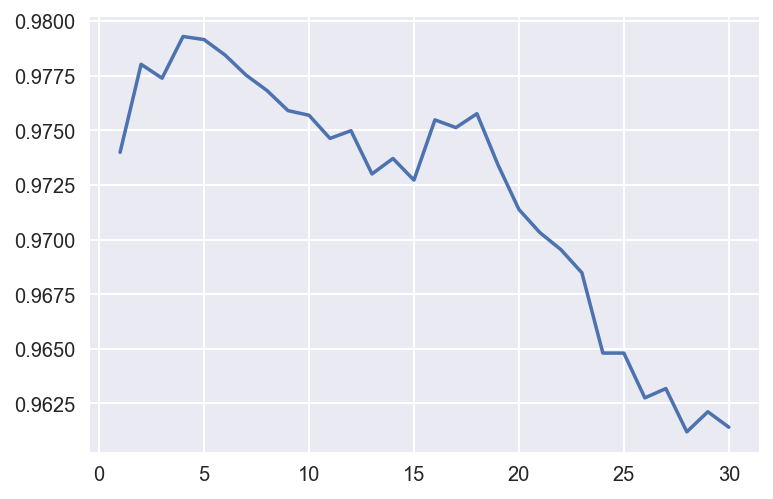

In [90]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

In [91]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [92]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.9787985865724381
{'n_neighbors': 18, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='distance')


In [93]:
knn_grid = grid.best_estimator_
knn_grid.score(X,y)

0.9805550645218314

### Using RandomizedSearchCV
Randomized search is a close cousin of grid search. It doesn't always provide the best result but it's fast.

In [94]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
          error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=False)

In [95]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.9787985865724381
{'weights': 'distance', 'n_neighbors': 18}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='distance')


In [96]:
knn_ran = grid.best_estimator_
knn_ran.score(X,y)

0.9805550645218314

### 7c. Gaussian Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(test_x)
gaussian_accy = round(accuracy_score(y_pred, test_y), 3)
print(gaussian_accy)

0.917


### 7d. Support Vector Machines (SVM)

In [98]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9790341578327444
{'C': 2.5, 'gamma': 1}
SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [118]:
svm_grid = grid_search.best_estimator_
svm_grid.probability = True
svm_grid.score(X,y)

0.9805550645218314

### 7e. Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,6)
max_feature = [3,4,5,6,7,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
decisionTree_grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
decisionTree_grid.fit(X, y) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 6), 'max_features': [3, 4, 5, 6, 7, 'auto'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [102]:
print( decisionTree_grid.best_params_)
print (decisionTree_grid.best_score_)
print (decisionTree_grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 5}
0.9540392434152377
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [103]:
dctree = decisionTree_grid.best_estimator_
## using the best found hyper paremeters to get the score.
dctree.score(X,y)

0.9395439278769666

### 7f. Bagging Classifier

In [104]:
from sklearn import tree

In [105]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X, y)
y_pred = BaggingClassifier.predict(test_x)
bagging_accy = round(accuracy_score(y_pred, test_y), 3)
print(bagging_accy)

0.981


### 7g. Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [90,95,100,105,110]
max_depth = range(1,30)
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators, 
         'max_depth':max_depth, 
        }
randomforest_grid = GridSearchCV(RandomForestClassifier(),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
randomforest_grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [90, 95, 100, 105, 110], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
print (randomforest_grid.best_score_)
print (randomforest_grid.best_params_)
print (randomforest_grid.best_estimator_)

0.9792108362779741
{'max_depth': 9, 'n_estimators': 105}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=105, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [108]:
random_forest = randomforest_grid.best_estimator_
random_forest.score(X,y)

0.9805550645218314

### 7h. Gradient Boosting Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(X, y)
y_pred = gradient.predict(test_x)
gradient_accy = round(accuracy_score(y_pred, test_y), 3)
print(gradient_accy)

0.976


### 7i. XGBClassifier

In [110]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(test_x)
XGBClassifier_accy = round(accuracy_score(y_pred, test_y), 3)
print(XGBClassifier_accy)

0.974


C:\Users\Owner\Anaconda2\envs\mypython3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### AdaBoost Classifier

In [111]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X, y)
y_pred = adaboost.predict(test_x)
adaboost_accy = round(accuracy_score(y_pred, test_y), 3)
print(adaboost_accy)

0.954


### 7k. Extra Trees Classifier

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(test_x)
extraTree_accy = round(accuracy_score(y_pred, test_y), 3)
print(extraTree_accy)

0.981


### 7l. Gaussian Process Classifier

In [113]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(test_x)
gau_pro_accy = round(accuracy_score(y_pred, test_y), 3)
print(gau_pro_accy)

0.969


### 7m. Voting Classifier

In [119]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('logreg_grid', logreg_grid),
    ('logreg',logreg), 
    ('svc', svm_grid),
    ('random_forest', randomforest_grid),
    ('gradient_boosting', gradient),
    ('decision_tree',dctree), 
    ('decision_tree_grid',decisionTree_grid), 
    ('knn',knn),
    ('knn_grid', knn_grid),
    ('XGB Classifier', XGBClassifier),
    ('BaggingClassifier', BaggingClassifier),
    ('ExtraTreesClassifier', ExtraTreesClassifier),
    ('gaussian',gaussian),
    ('gaussian process classifier', GaussianProcessClassifier)], voting='soft')

voting_classifier = voting_classifier.fit(X,y)

In [120]:
y_pred = voting_classifier.predict(test_x)
voting_acc = round(accuracy_score(y_pred, test_y), 3)
print(voting_acc)

0.977


C:\Users\Owner\Anaconda2\envs\mypython3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
